# <span style="color:blue">Análisis de tienda en línea ICE</span>

## Tabla de Contenidos

### * Introducción
    
### * Etapa 1. Descripcion de los datos

### * Etapa 2. Preprocesamiento de datos

### * Etapa 3. Analisis de datos

### * Etapa 4. Creación de un perfil de usuario para cada región

### * Etapa 5. Probar las hipótesis

### * Etapa 6. Conclusiones

## Introducción

La tienda de videojuegos Ice vende videojuegos por todo el mundo. Usando informacion disponible en fuentes abiertas sobre las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos, se identificaran patrones que determinen si un juego es exitoso o no. Esto permitira encontrar proyectos potenciales y campañas publicitarias que beneficien a la compania.

### Objetivos:

* Identificar patrones que determinan el éxito de los videojuegos.
* Detectar juegos que tienen potencial para tener un gran éxito en términos de ventas para detectar proyectos prometedores y planificar campañas publicitarias
* Pronósticar ventas para 2017

Probar las siguientes hipótesis:

   1. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
   2. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.



## Etapa 1. Descripción de los datos <a id='data_review'></a>

Abrir  los datos y examínarlos.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st  
import seaborn as sns
# Cargar todas las librerías necesarias

In [2]:
games = pd.read_csv('/datasets/games.csv') #cargar archivo y creacion de DataFrame

In [3]:
games.head() #ver las cinco primeras lineas

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Se puede ver que este DataFrame consiste de 11 columnas y 16715 entradas:

* Name (Nombre)
* Platform (Plataforma)
* Year_of_Release (Año de lanzamiento)
* Genre (Género) 
* NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 
* EU_sales (ventas en Europa en millones de dólares estadounidenses) 
* JP_sales (ventas en Japón en millones de dólares estadounidenses) 
* Other_sales (ventas en otros países en millones de dólares estadounidenses) 
* Critic_Score (máximo de 100) 
* User_Score (máximo de 10) 
* Rating (Clasificación) (ESRB)


1. Se modificaran los nombres de las columnas a minúsculas.


2. Se cambiaran tipos de datos al fortmato necesario. Por ejemplo Year_of_Release es de tipo float; debido a que no es un formato de fecha "completo" en lugar de datetime, se tendria que modificar a integer.


3. Hay valores faltantes en las columnas de Name, Year_of_Release, Genre, Critic_Score y User_Score.


# Etapa 2. Preprocesamientos de los datos <a id='data_review'></a>

Se empezara modificando el encabezado de los datos a minúsculas.

In [5]:
games.columns = games.columns.str.lower() #conversion a minúsculas

In [6]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## Conversion de datos y valores ausentes

In [7]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Sabemos que el tipo de datos de la columna year_of_release of float64. Vamos a analizar los valores unicos de la columna.

In [8]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

También tenemos el valor NaN en la columna: year_of_release. Por lo tanto, tiene sentido que la columna sea de tipo float64, ya que NaN se considera flotante en pandas. Se cambiará la columna al data type Int64 el cual puede representar valores Nan sin necesidad de eliminarlos. Debido a que es un número considerable de valores ausentes en la columna (269) se decidió no removerlos.

In [9]:
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

Hechemos un vistazo a los valores unicos de user_score:

In [10]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Se ve que el tipo de datos en esta columna deberia estar formateada a float pero es de tipo object (string). Viendo los valores tbd (to be determined), se deduce que son valores sin asignar, entonces es conveniente convertitlos a NaN.

In [11]:
games['user_score'] = pd.to_numeric(games['user_score'], errors = 'coerce') #convirtiendo a flot, usando el parametro errors=coerce para remplazar tbd con NaN.
games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

En cuanto a las columnas de genre y name se pueden eliminar valores faltantes sin que comprometa nuestro análisis. Estos valores representan un porcentaje muy bajo de las columnas y no hay manera lógica de reemplazarlos con la media o mediana.

In [12]:
games['user_score'].dtype

dtype('float64')

Ahora revisaremos valores ausentes de las columnas name y genre.

In [13]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [14]:
games[games['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


En cuanto a las columnas de genre y name se pueden eliminar valores faltantes sin que se comprometa nuestro análisis. Estos valores representan un porcentaje muy bajo de las entradas y no habría manera lógica de reemplazarlos con medio o mediana. Cabe resaltar que estas dos entradas tienen faltantes name, genre, critic_score, user_score y rating.

In [15]:
games = games.dropna(subset=['name', 'genre']).reset_index(drop=True) #Eliminamos valores duplicados de name y genre
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Vamos a revisar de nuevo valores faltantes de cada columna en el DataFrame

In [16]:
games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

year_of_release todavia cuenta con 269 valores ausentes pero no se eliminaran porque pueden compremeter la integredad de los datos y la calidad del analisis.

Entonces nos vamos a enfocar en revisar el porcentaje de datos faltantes. 

In [17]:
n_rows = games.shape[0]
100 * games.isna().sum() / n_rows

name                0.000000
platform            0.000000
year_of_release     1.609526
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.313349
user_score         54.586250
rating             40.471489
dtype: float64

En la columna critic_score faltan 51.31% de los datos, mientras que en la de user_core 54.58% y en rating existe un 40.47% de datos faltantes, lo cual es una cantidad bastante grande para las tres columnas. Probablemente estos juegos aún no hayan sido revisados. No debemos intentar completar los valores faltantes ya que eso puede afectar los datos y sesgar el análisis.

Ahora vamos a calcular las ventas totales para cada juego y añadir la columna total_sales al DataFrame.

In [18]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [19]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


# Etapa 3. Analisis de los datos <a id='data_review'></a>

## Juegos lanzados por año

Averigüemos cuántos juegos se lanzaron en diferentes años:

In [20]:
games_per_year = games.groupby('year_of_release')['name'].count()
games_per_year = games_per_year.reset_index()
games_per_year = games_per_year.rename(columns={'name': 'number_of_games'})
games_per_year

,year_of_release,number_of_games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Graficaremos esta informacion para visualizar los juegos lanzados por año

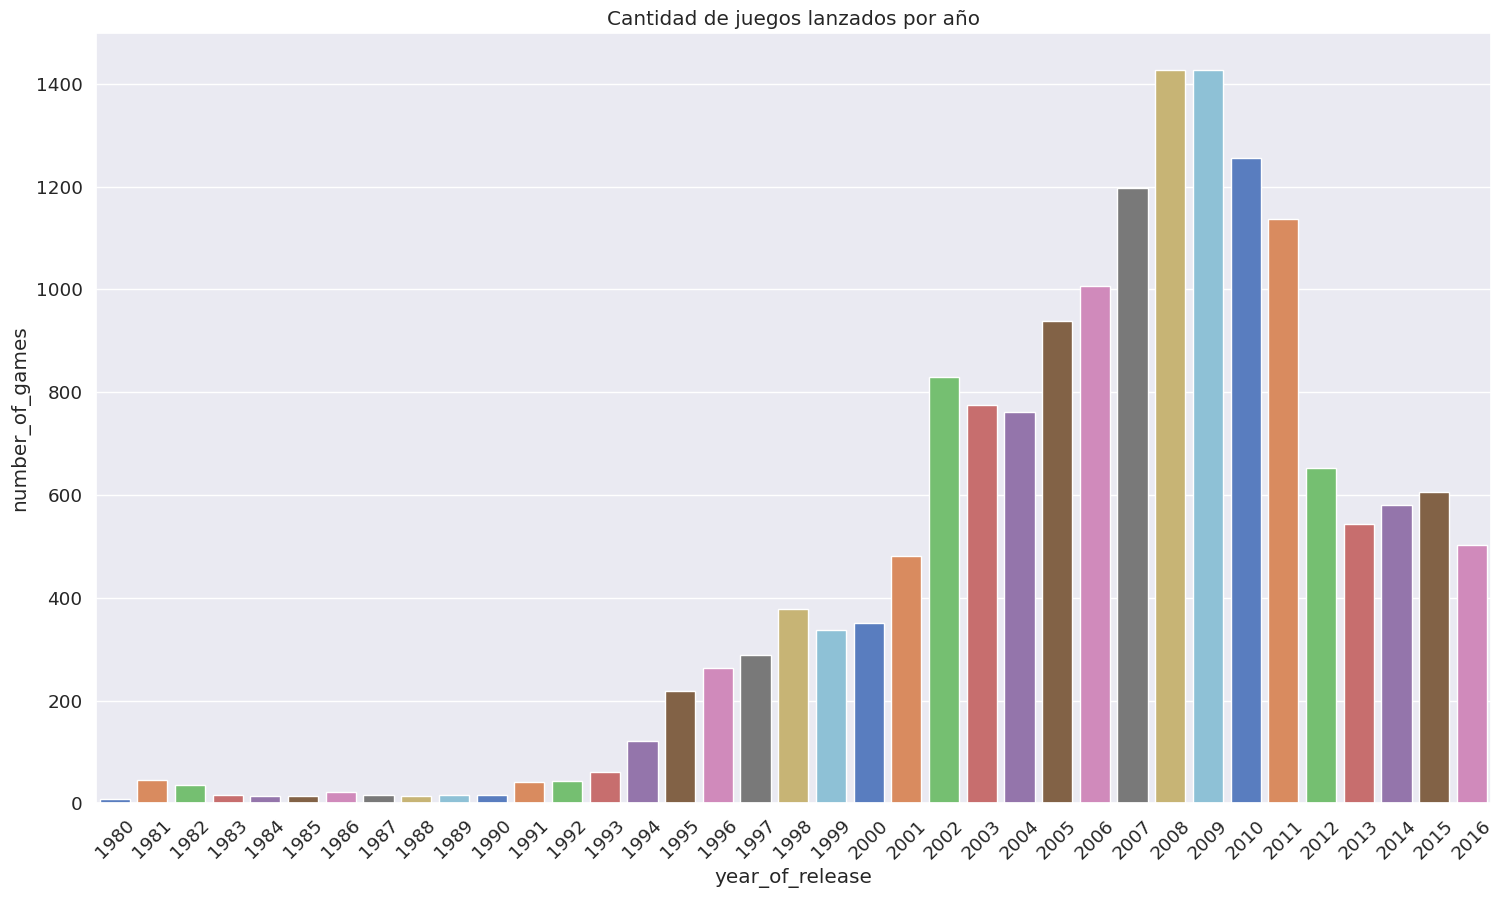

In [21]:
plt.figure(figsize=(18, 10))
sns.set(font_scale = 1.2)

ax = sns.barplot(data=games_per_year, x='year_of_release', y='number_of_games', palette = 'muted')
ax.set(title='Cantidad de juegos lanzados por año')
plt.xticks(rotation = 45)

plt.show()

A partir de los datos y el gráfico de barras anteriores, podemos intentar responder: ¿Son significativos los datos de cada período?:

Podemos observar que la cantidad de juegos lanzados ha aumentado a lo largo de los años, con algunas excepciones de recuentos más bajos en los años anteriores. Los datos parecen volverse más significativos en términos del número de juegos desde finales de los años 1990 en adelante, con un aumento sustancial en el número de juegos lanzados en los años 2000 y más allá.

Si bien los datos de cada período pueden no ser igualmente significativos, el creciente número de juegos lanzados en los últimos años sugiere que el conjunto de datos se vuelve más sustancial y potencialmente más representativo del mercado general de videojuegos en esos años.

Podemos derivar algunas otras conclusiones sobre la base de los datos y el gráfico anterior:

* El conjunto de datos contiene lanzamientos de juegos desde 1977 hasta 2016. Esto indica que el conjunto de datos cubre una amplia gama de años y permite análisis e información sobre la evolución de la industria de los videojuegos a lo largo de varias décadas.

* La cantidad de juegos lanzados generalmente ha aumentado con el tiempo, con algunas fluctuaciones en ciertos años. Esta tendencia se alinea con el crecimiento y la popularidad de la industria del juego, lo que refleja la expansión del mercado y el creciente número de desarrolladores y editores de juegos.

* El período comprendido entre finales de los 90 y principios de los 2000 marca un aumento significativo en el número de lanzamientos de juegos, lo que indica un período de rápido crecimiento e innovación en la industria. Podría deberse a que en esta época surgieron consolas influyentes como PlayStation, Nintendo 64 y, más tarde, PlayStation 2, lo que contribuyó al aumento del desarrollo y los lanzamientos de juegos.

* El número máximo de juegos se lanzó en 2008 y 2009.

En el contexto de la planificación para el año 2017, es crucial centrarse en los años más recientes, ya que tienen mayor relevancia. Analizar datos de juegos lanzados en la década de 1980 no contribuiría al desarrollo de un plan eficaz para 2017. Por lo tanto, deberíamos priorizar el análisis de años recientes que se alineen con las tendencias y dinámicas actuales.


## Ventas en diferentes plataformas

In [22]:
sales_plat = games.groupby('platform').sum().sort_values(by= 'total_sales', ascending = False)['total_sales'].reset_index()
sales_plat

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


La tabla de arriba representa entonces las ventas en millones de dolares de 30 plataformas. Ahora observemos las 10 plataformas con mas ventas.

In [23]:
top_ten_plat = sales_plat.head(10)
top_ten_plat

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


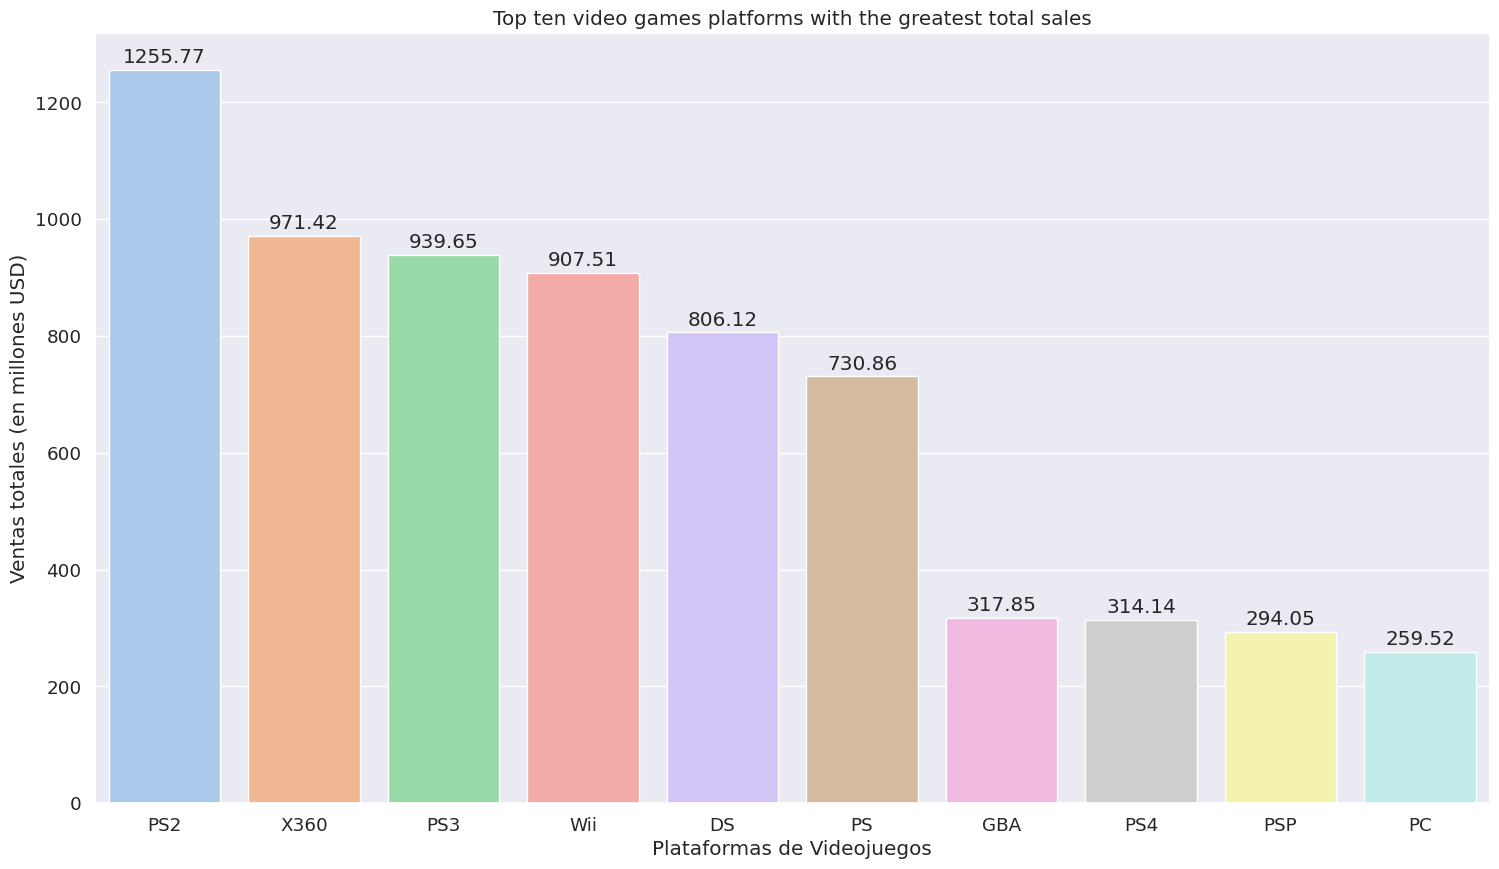

In [24]:

plt.figure(figsize=(18, 10))
sns.set(font_scale = 1.2)

# Grafico de barras de DataFrame - top_ten_plat
ax = sns.barplot(data=top_ten_plat, x='platform', y='total_sales', palette='pastel')
ax.set(title='Top ten video games platforms with the greatest total sales',
       xlabel='Plataformas de Videojuegos', 
       ylabel='Ventas totales (en millones USD)')

# Mostrar valores de barras
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

plt.show()

La plataforma PS2(Playstation) tiene las ventas totales mas altas con 1255.77 (USD millones de dolares). Le siguen X360 de Microsoft y PS3 con 971.42 y Wii 907.51 (USD millones de dolares) respectivamente. DS tambien domino una parte del mercado con 806.12 millones. PS se llevo una tajada del mercado con ventas de 730.86 millones de USD.

In [25]:
top_six_plat= ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
top_six_plat = games[games['platform'].isin(top_six_plat)]
grpd_top_six_plat = top_six_plat.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
grpd_top_six_plat

,platform,year_of_release,total_sales
0,DS,1985,0.02
1,DS,2004,17.27
2,DS,2005,130.14
3,DS,2006,119.81
4,DS,2007,146.94
...,...,...,...
62,X360,2012,99.74
63,X360,2013,88.58
64,X360,2014,34.74
65,X360,2015,11.96


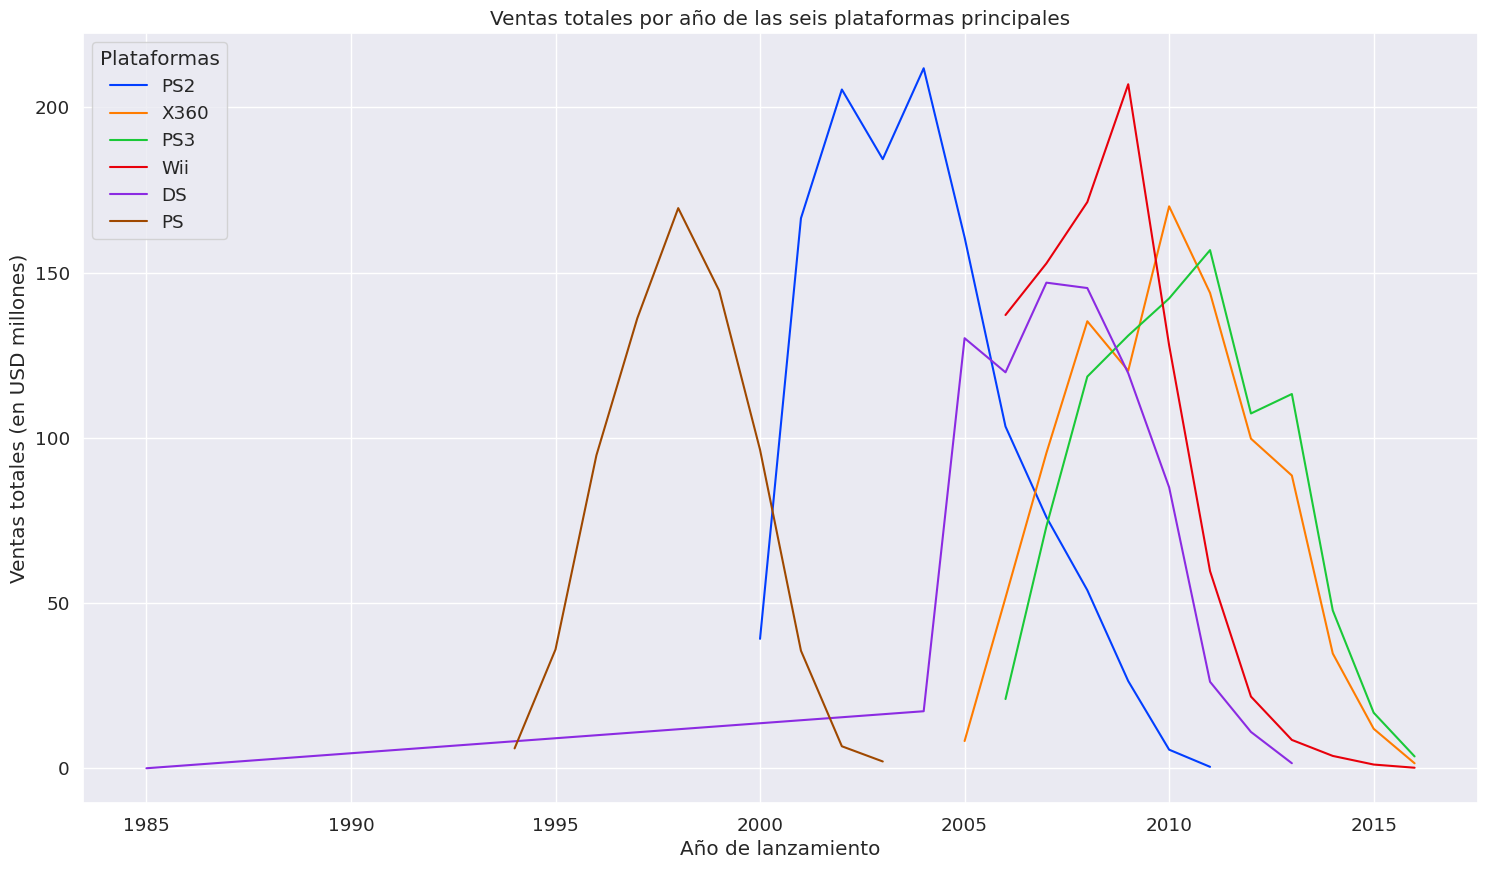

In [26]:

plt.figure(figsize=(18, 10))
sns.set(font_scale=1.2)

ax = sns.lineplot(data=grpd_top_six_plat,
                  x='year_of_release',
                  y='total_sales',
                  hue='platform',
                  hue_order=['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'],
                  palette='bright')

ax.set(title='Ventas totales por año de las seis plataformas principales', 
       xlabel='Año de lanzamiento',
       ylabel='Ventas totales (en USD millones)')

plt.legend(loc='upper left', title='Plataformas')

plt.show()


De acuerdo al grafico anterior, las plataformas que solían ser populares pero que ahora no tienen ventas son:

* PS2: La plataforma PS2 tuvo sus últimas ventas registradas en 2011.
* X360: La plataforma X360 tuvo sus últimas ventas registradas en 2016.
* PS3: La plataforma PS3 tuvo sus últimas ventas registradas en 2016.
* Wii: La plataforma Wii tuvo sus últimas ventas registradas en 2016.
* DS: La plataforma DS tuvo sus últimas ventas registradas en 2013.
* PS: La plataforma PS tuvo sus últimas ventas registradas en 2003.

* La plataforma DS tuvo la vida útil más larga, de 28 años, desde 1985 hasta 2013. Su pico de ventas se produjo en 2007.
* La plataforma PS tuvo una vida útil de 9 años desde 1994 hasta 2003, con su pico de ventas en 1998.
* La plataforma PS2 tuvo una vida útil de 11 años desde 2000 hasta 2011, y su pico de ventas se produjo en 2004.
* Las plataformas PS3 y Wii tuvieron una vida útil de 10 años, de 2006 a 2016. Los picos de ventas de PS3 y Wii se produjeron en 2011 y 2009 respectivamente, mientras que X360 tuvo una vida útil de 11 años y alcanzó su pico de ventas en 2010.

Analicemos el tiempo que tardan las plataformas en generar ventas significativas y alcanzar su pico de ventas. Comparemos la tendencia entre las consolas más nuevas (PS3, Wii, X360) y las consolas más antiguas (DS, PS, PS2).

* Consolas más nuevas (PS3, Wii, X360):

Las plataformas PS3, Wii y X360 tuvieron una vida útil de 10 (u 11) años (de 2006 a 2016).
Estas plataformas tardaron aproximadamente entre 3 y 4 años en comenzar a generar un nivel de ventas significativo.
El pico de ventas de estas plataformas se produjo entre el cuarto y séptimo año de su vida útil.

* Consolas antiguas (DS, PS, PS2):

La plataforma DS tuvo la vida útil más larga de 28 años (de 1985 a 2013), mientras que las plataformas PS y PS2 tuvieron una vida útil de 9 años (de 1994 a 2003) y 11 años (de 2000 a 2011), respectivamente.
Estas plataformas tardaron entre 7 y 10 años en comenzar a generar ventas significativas.
El pico de ventas de estas plataformas se produjo entre el sexto y el décimo año de su vida útil.

A partir de estas observaciones, podemos concluir que las consolas más nuevas tienden a generar ventas significativas y alcanzar su pico de ventas más rápido que las consolas más antiguas. Las consolas más nuevas tardaron entre 3 y 4 años en establecer una presencia significativa en el mercado, mientras que las consolas más antiguas tardaron entre 7 y 10 años.

Ahora veamos las plataformas de juegos que tuvieron ventas continuas todavia en 2016

In [27]:
pla_sales_u16 = games.query('year_of_release == 2016')['platform']
pla_sales_u16 = pla_sales_u16.unique().tolist()
pla_sales_u16

['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii']

Ahora que tenemos las listas de las consolas que si tuvieron actividad durante 2016, analizemos las ventas anuales:

In [28]:

#Plataformas con ventas en 2016
pla_sales_u16 = ['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'] 

#Filtrado de datos de plataformas
pla_sales_u16 = games[games['platform'].isin(pla_sales_u16)]

#Agrupar datos por plataforma y año. Sumar ventas totales
grouped_pla_sales_u16 = pla_sales_u16.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Ordenar en orden ascendente
sorted_pla_sales_u16 = grouped_pla_sales_u16.sort_values(by='total_sales', ascending=False)
sorted_pla_sales_u16['year_of_release'] = sorted_pla_sales_u16['year_of_release'].astype(int)

#Obtener las 5 plataformas con ventas mas altas
top_5_platforms = sorted_pla_sales_u16.groupby('platform').sum().nlargest(5, 'total_sales').reset_index()
top_5_yr = sorted_pla_sales_u16[sorted_pla_sales_u16['platform'].isin(top_5_platforms['platform'])]

top_5_yr

,platform,year_of_release,total_sales
56,Wii,2009,206.97
55,Wii,2008,171.32
74,X360,2010,170.03
37,PS3,2011,156.78
54,Wii,2007,152.77
75,X360,2011,143.84
36,PS3,2010,142.17
53,Wii,2006,137.15
72,X360,2008,135.26
35,PS3,2009,130.93


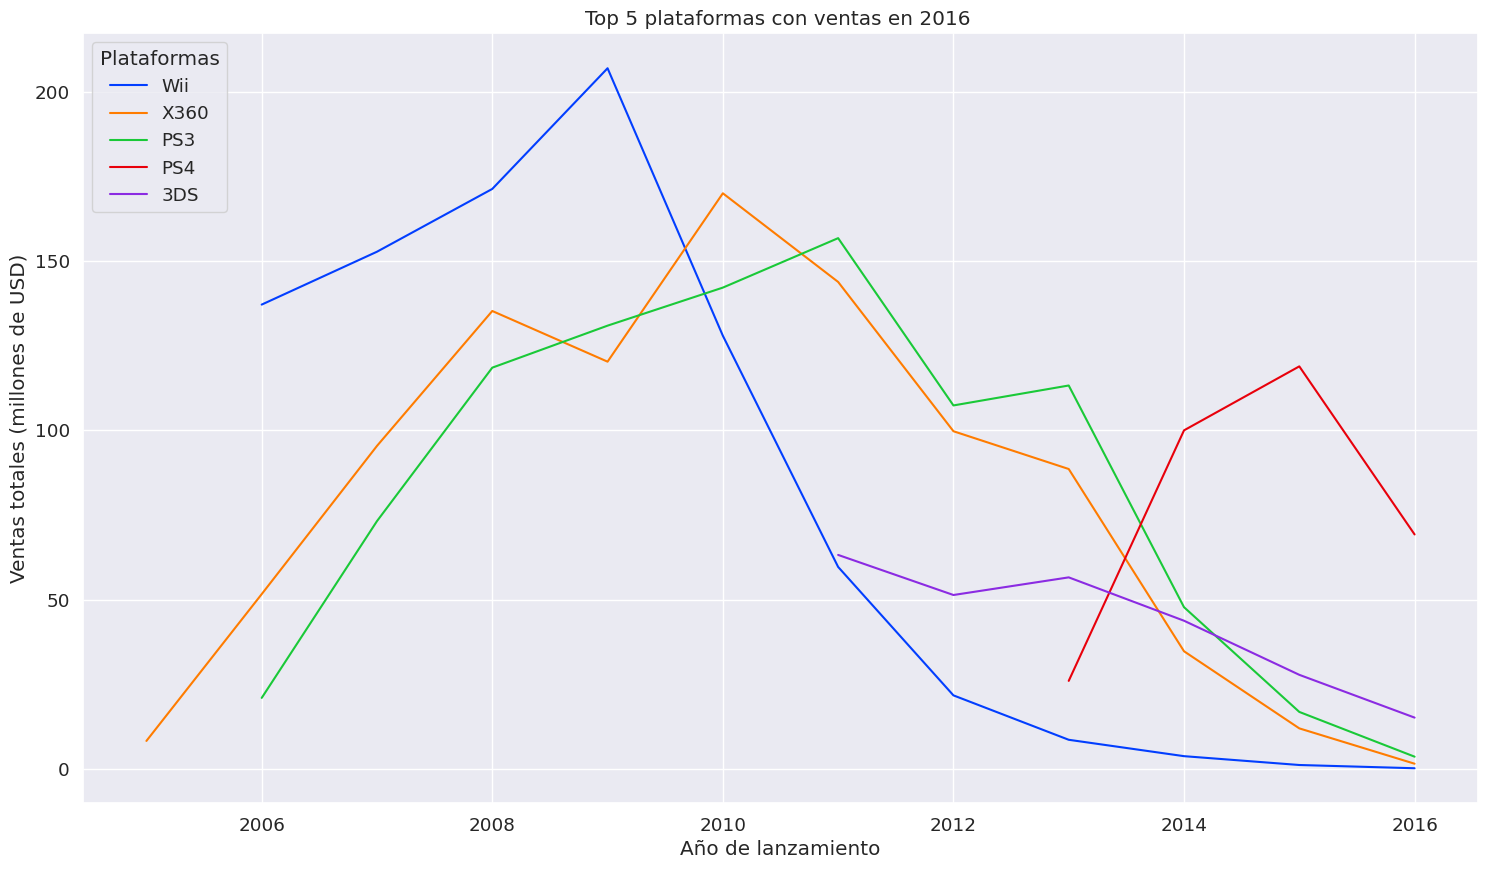

In [29]:

plt.figure(figsize=(18, 10))
sns.set(font_scale = 1.2)

# Generar grafico de lineas
ax = ax = sns.lineplot(data=top_5_yr,
                  x='year_of_release',
                  y='total_sales',
                  hue='platform',
                  palette='bright')

ax.set(title='Top 5 plataformas con ventas en 2016 ',
       xlabel='Año de lanzamiento', 
       ylabel='Ventas totales (millones de USD)')

plt.legend(loc='upper left', title='Plataformas')

plt.show()

  
Podemos observar que:

*  Wii: Desde su lanzamiento en el 2006 el Wii tuvo un constante incremento de ventas, teniendo su pico más alto en el 2009 con más de USD 200 millones. Desde entonces se presentó un declive gradual en ventas. 
 
* X360: Esta consola fue lanzada en 2005, alcanzando su punto de ventas mas alto en 2010. Desde ahi, presenta un declive en ventas. Es interesante ver el life span de esta plataforma comparada con las otras, teniendo presencia desde el 2005 hasta el 2016. 
    
* PS3:La plataforma fue lanzada en el 2006. El punto más alto de ventas fue durante el periodo de 2007 - 20011, con un declive considerable después de ese periodo.
   
 * PS4:Desde su lanzamiento en el 2013 ha tenido un incremento en ventas consistente, alcanzando el punto más significativo en ingresos en 2015. Para el 2016 las ventas exceden los 50 millones de dólares. 
    
* 3DS:Esta consola fue lanzada en el 2011 y ha mostrado un declive de ventas totales a través del tiempo.  Las ventas totales tuvieron su punto más alto en el 2011 y 2013.
     
        
  ### Por la gráfica podemos determinar que entre **2013 - 2016** las plataformas han mostrado una competencia más fuerte para dominar el mercado. Por ende, para crear un plan para el 2017, tiene sentido centrarse en los datos de ese periodo.


## Plataformas potencialmente rentables (2013 - 2016)

In [30]:
#Asegarse de ignorar datos anteriores al 2013
games = games.query('year_of_release>=2013')

In [31]:
#Ver numero de registros
games.shape

(2233, 12)

El número de filas disminuyó bastante. Vamos a cerciorarnos que estemos trabajando con el rango de tiempo correcto

In [32]:
games['year_of_release'].unique()

<IntegerArray>
[2013, 2015, 2014, 2016]
Length: 4, dtype: Int64

Vamos a ver las ventas totales de cada plataforma en cada año de lanzamiento.

In [33]:
# Agrupar por plataforma y año_de_lanzamiento, luego agregar sumando 'total_sales
grpd_vd_potential = games.groupby(['platform', 'year_of_release'])['total_sales'].agg('sum').reset_index()
grpd_vd_potential

,platform,year_of_release,total_sales
0,3DS,2013,56.57
1,3DS,2014,43.76
2,3DS,2015,27.78
3,3DS,2016,15.14
4,DS,2013,1.54
5,PC,2013,12.38
6,PC,2014,13.28
7,PC,2015,8.52
8,PC,2016,5.25
9,PS3,2013,113.25


Vamos a generar un gráfico de esta información:

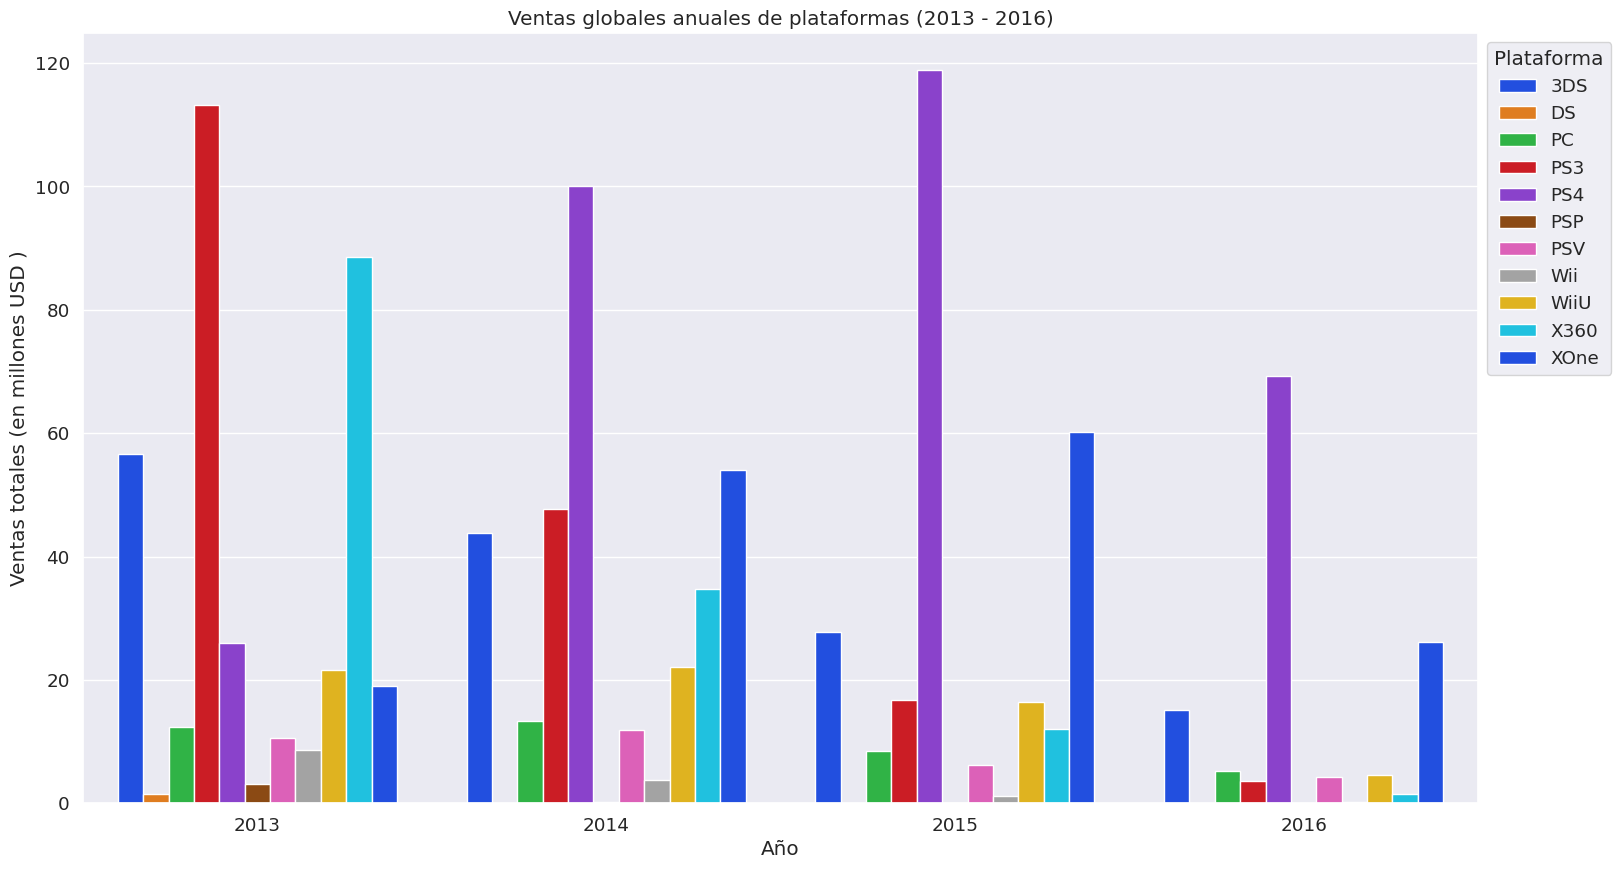

In [34]:
plt.figure(figsize=(18, 10))
sns.set(font_scale=1.2)

ax = sns.barplot(data=grpd_vd_potential,
                 x='year_of_release',
                 y='total_sales',
                 hue='platform',
                 palette='bright')

ax.set(title='Ventas globales anuales de plataformas (2013 - 2016)',
       xlabel='Año',
       ylabel='Ventas totales (en millones USD )')

plt.legend(title='Plataforma', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

Con base en los datos de los años 2013 a 2016 y los gráficos de líneas y barras anteriores, podemos sacar las siguientes conclusiones sobre las plataformas potencialmente rentables, las plataformas líderes en ventas y las plataformas que están creciendo o disminuyendo:

&#127918; Plataformas Potencialmente Rentables (2013-2016):

PS4: La plataforma PS4 ha mostrado un crecimiento constante en las ventas a lo largo de los años, con un aumento de las ventas de 2013 a 2015, seguido de una ligera caída en 2016.

XOne: La plataforma XOne también ha mostrado un crecimiento constante en las ventas, con un aumento de las ventas de 2013 a 2015, seguido de una ligera disminución en 2016.

&#127918; Plataformas Líderes en Ventas:

PS4: La plataforma PS4 se destaca como la plataforma líder en términos de ventas durante el periodo especificado. Alcanzó elevadas cifras de ventas en 2014 y 2015, aunque hubo un ligero descenso en 2016.

XOne: La plataforma XOne sigue de cerca a la PS4 en términos de ventas, con un crecimiento significativo de 2013 a 2015. Experimentó una caída moderada en las ventas en 2016.

PS3: La plataforma PS3, si bien experimentó una caída en las ventas, aún mantuvo cifras de ventas notables durante el período especificado.

&#127918; Plataformas en crecimiento o en reducción:

Plataformas en crecimiento: Las plataformas que exhibieron un crecimiento en ventas de 2013 a 2015, seguido de una ligera caída en 2016, incluyen PS4 y XOne. Estas plataformas muestran potencial para un crecimiento continuo en el mercado de los juegos.

Plataformas en reducción: las plataformas que experimentaron una disminución significativa en las ventas durante el período especificado incluyen Wii, X360, PSP y DS. Estas plataformas están mostrando signos de disminución y disminución de su popularidad.
Entonces, de todo el análisis anterior, si tenemos que seleccionar algunas plataformas específicas en las que centrar nuestro estudio, podríamos elegir las siguientes:

PS4 y XOne: fueron las dos plataformas potencialmente rentables y las dos plataformas más líderes en ventas para el rango de años: 2013 a 2016.

PS3: La plataforma PS3, aunque experimentó una caída en las ventas, aún mantuvo cifras de ventas notables durante el período especificado.

# Ventas globales de  videojuegos por plataforma

Vamos a crear un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma para responder a las preguntas:
- Son significativas las diferencias en las ventas?
- ¿Qué sucede con las ventas promedio en varias plataformas?

In [35]:
#Estadísticas descriptivas de las ventas globales (en millones de dólares) de todos los juegos, desglosadas por plataforma
global_sales = games.groupby('platform')['total_sales'].describe()
global_sales

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


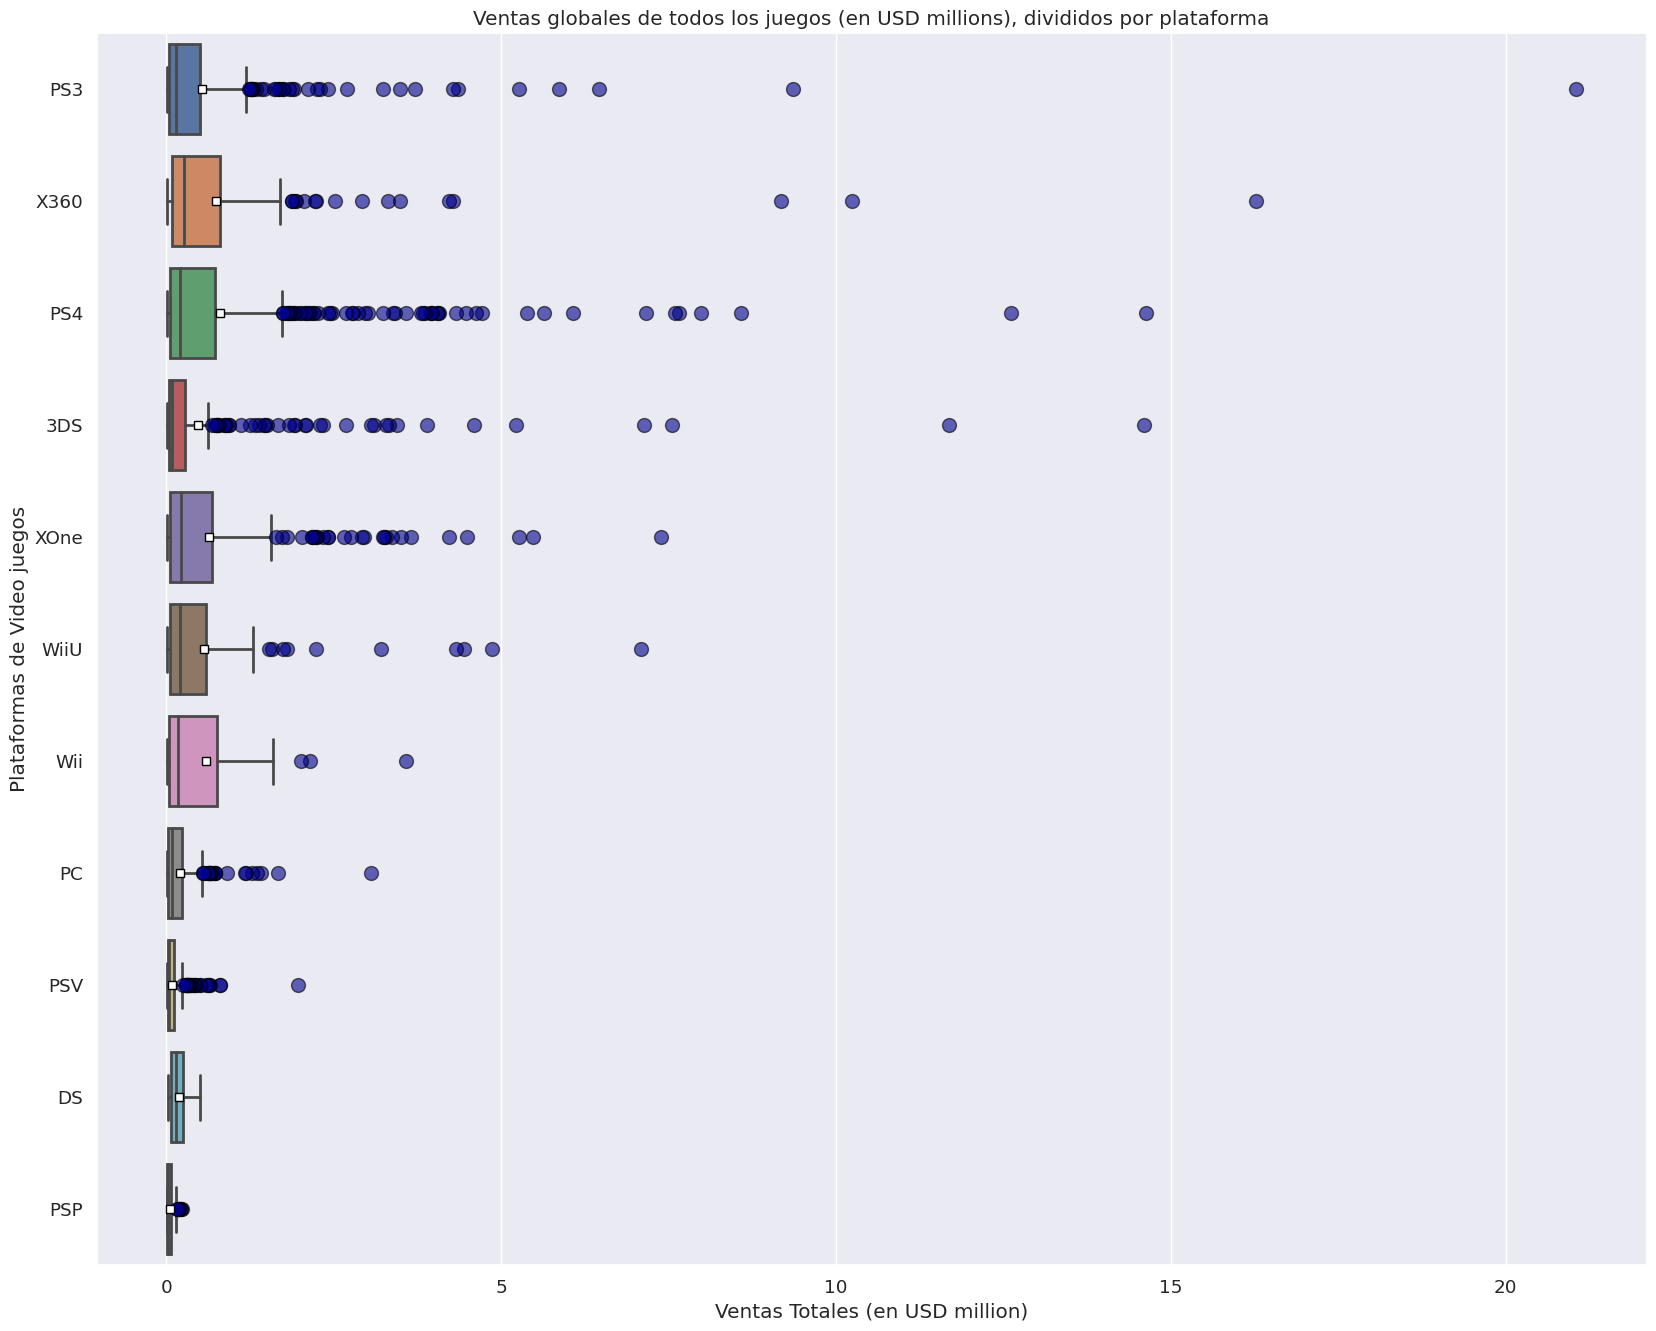

In [36]:

# Creacion de diagrama de caja para visualisar las ventas globales de los juegos, divididos por plataforma

plt.figure(figsize=(20, 16 ))
sns.set(font_scale = 1.2)

flierprops = dict(marker='o', markersize=10, markeredgecolor='black', markerfacecolor='darkblue', alpha=0.6)
meanprops = dict(marker='s', markerfacecolor='white', markeredgecolor='black')

my_plot = sns.boxplot(
    data=games,
    y='platform',
    x='total_sales',
    showmeans=True,
    orient='h',
    linewidth=2,
    flierprops=flierprops,
    meanprops=meanprops,
    palette='deep')

my_plot.set(xlabel='Ventas Totales (en USD million)',
            ylabel='Plataformas de Video juegos',
            title='Ventas globales de todos los juegos (en USD millions), divididos por plataforma')

plt.show()

Vamos a tratar de enfocar el box plot para ver mas a detalle:

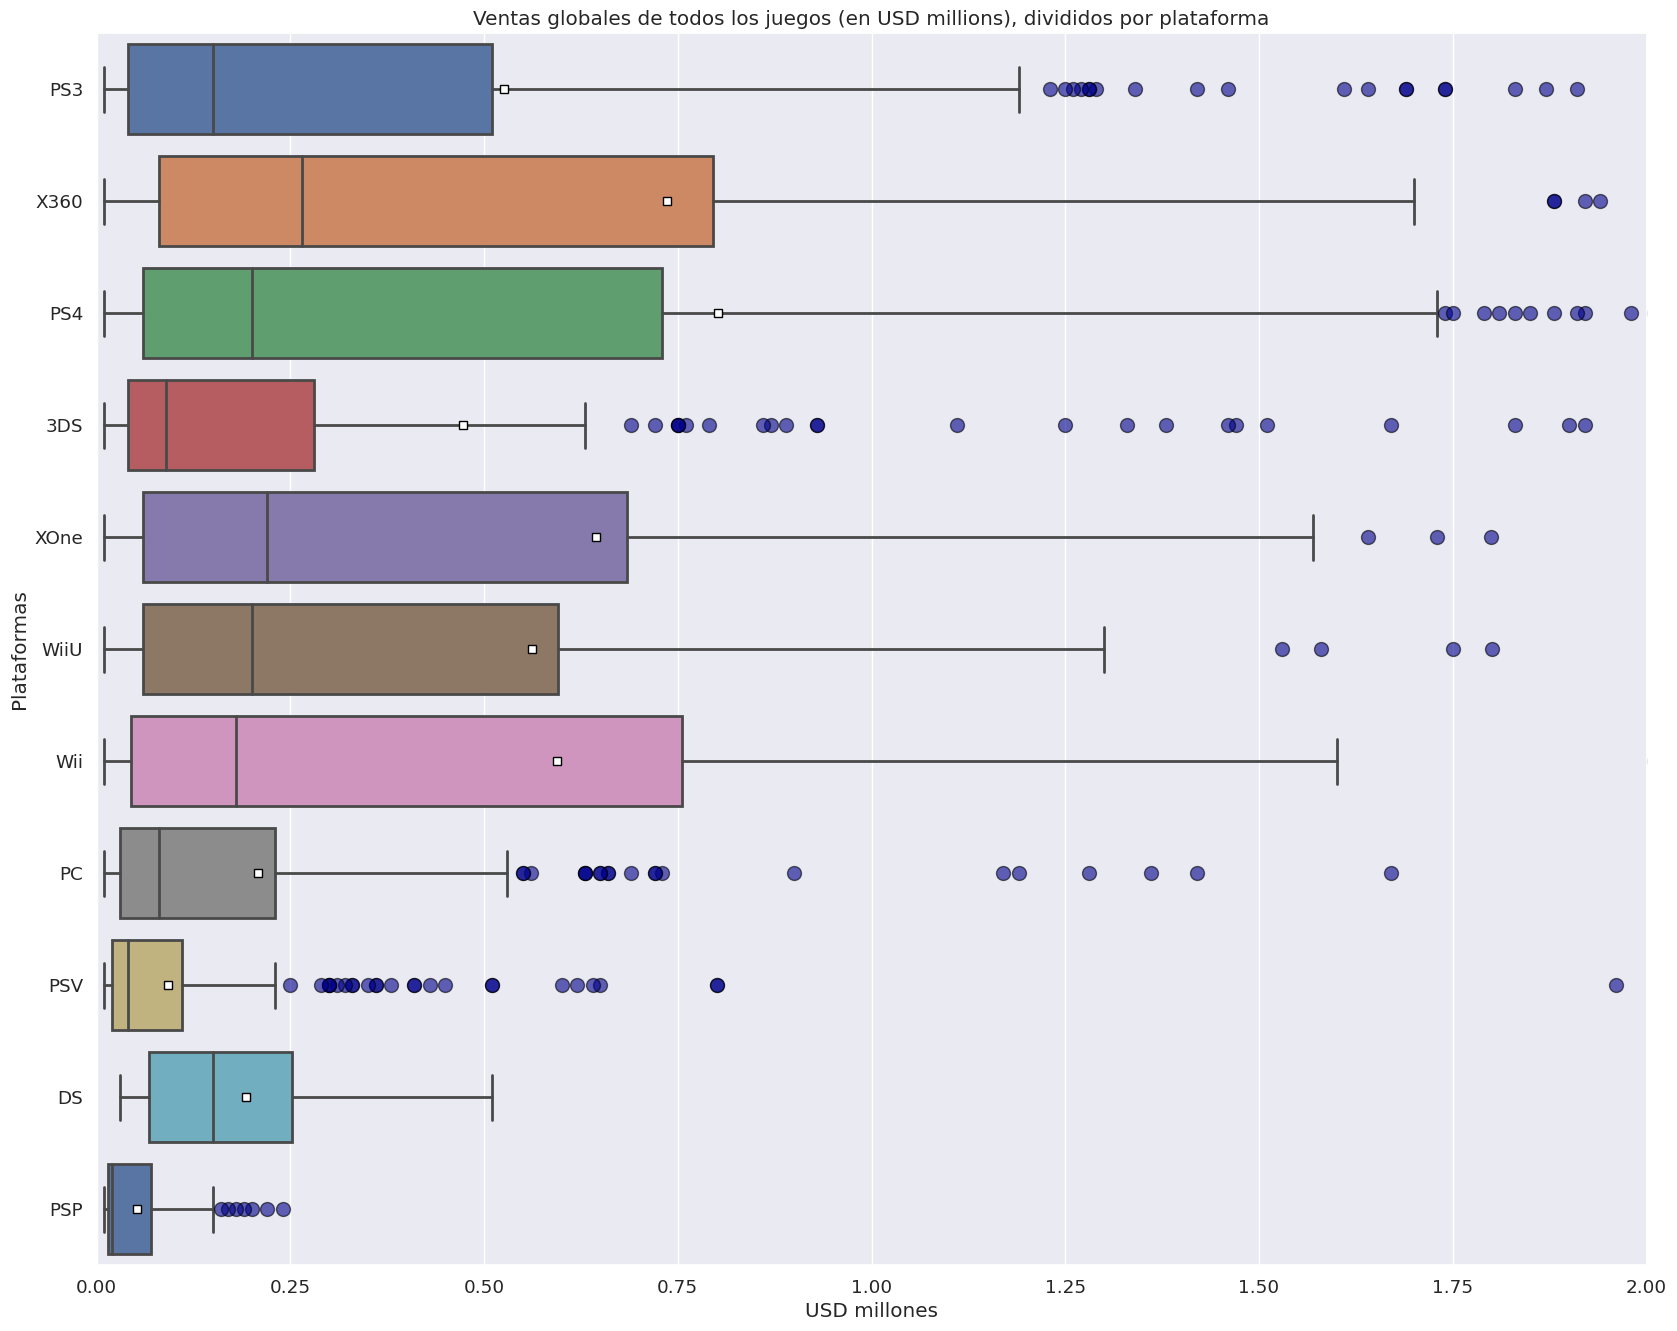

In [37]:

plt.figure(figsize=(20, 16 ))
my_plot = sns.boxplot(
    data=games,
    y='platform',
    x='total_sales',
    showmeans=True,
    orient='h',
    linewidth=2,
    flierprops=flierprops,
    meanprops=meanprops,
    palette='deep')

my_plot.set(xlabel='USD millones',
            ylabel='Plataformas',
            title='Ventas globales de todos los juegos (en USD millions), divididos por plataforma')

plt.xlim(0, 2)
plt.show()

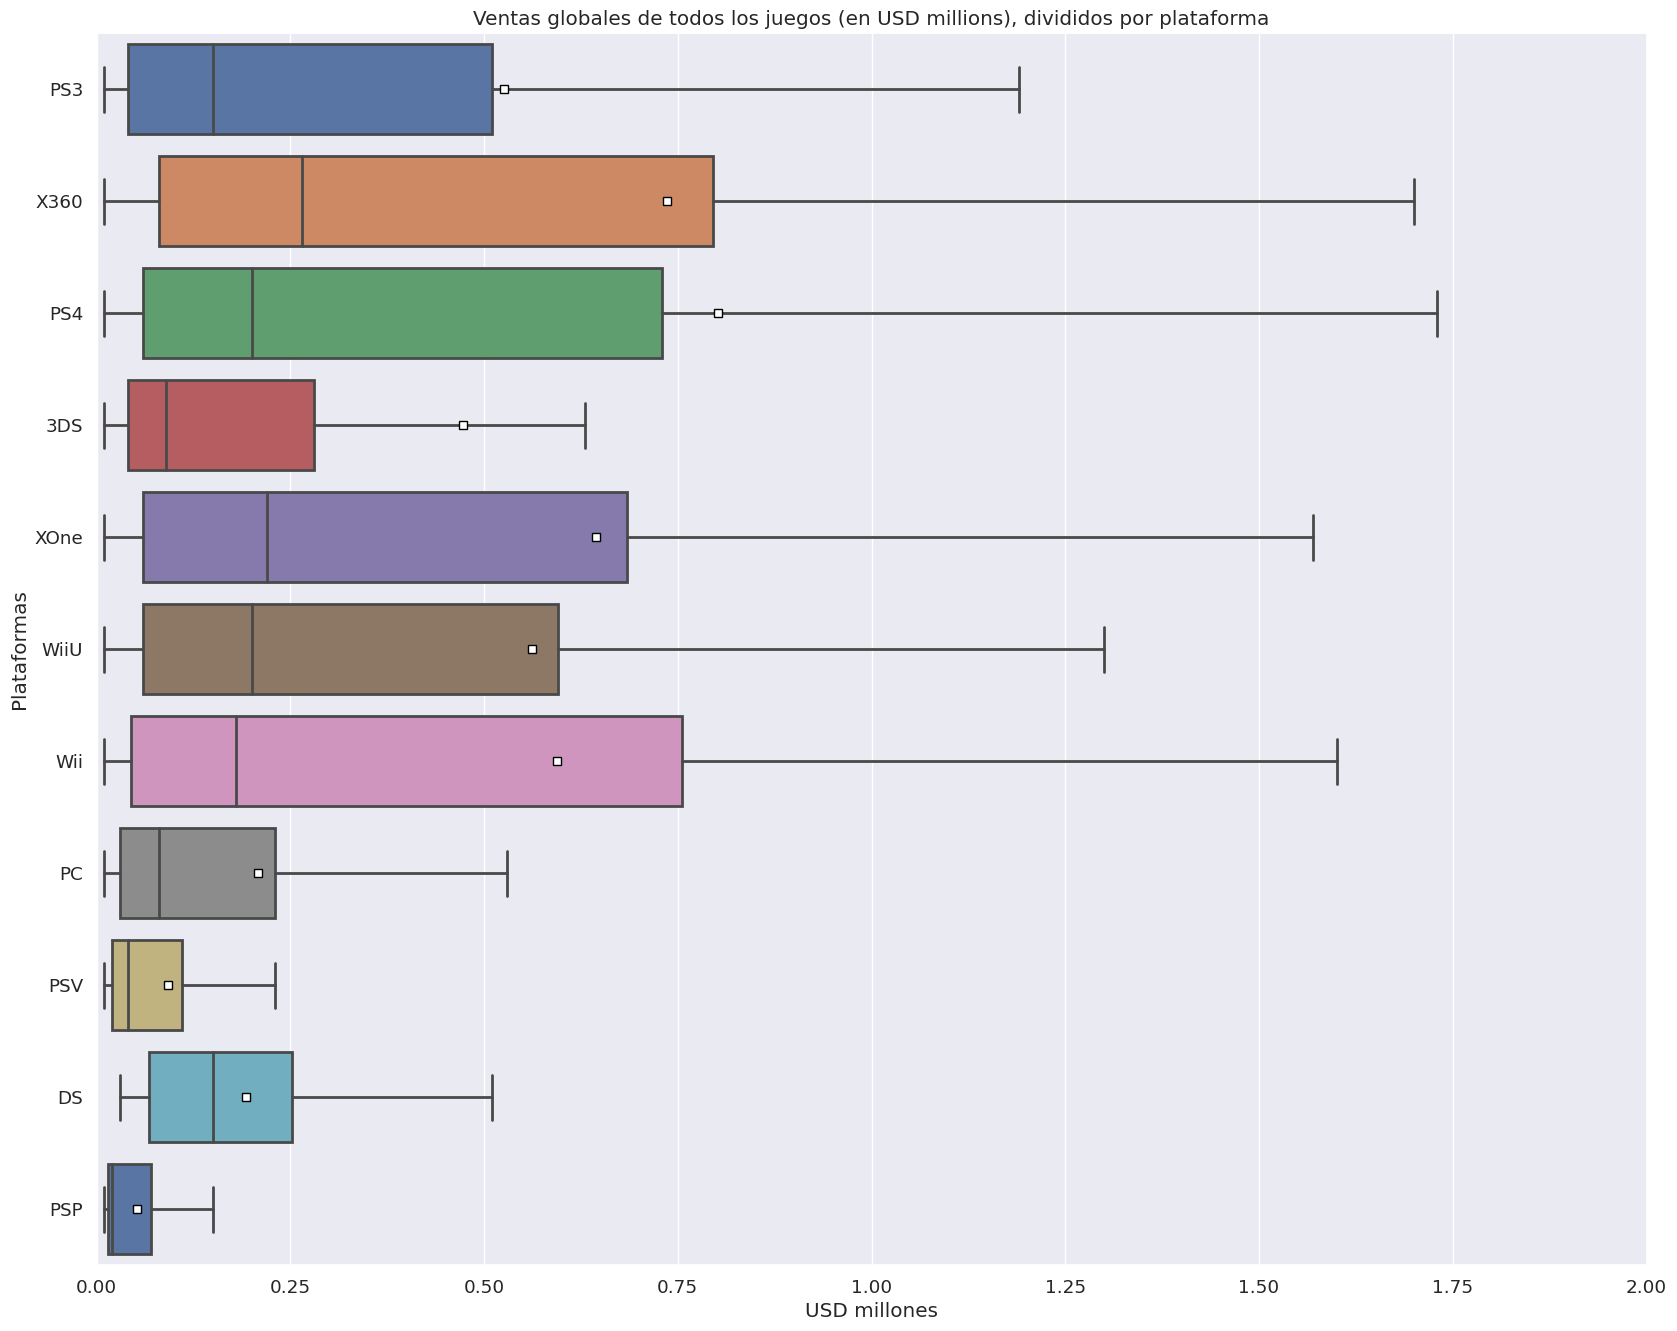

In [38]:


plt.figure(figsize=(20, 16))
my_plot = sns.boxplot(
    data=games,
    y='platform',
    x='total_sales',
    showmeans=True,
    orient='h',
    linewidth=2,
    flierprops=dict(markerfacecolor='black', markeredgecolor='black', marker=''),
    meanprops=meanprops,
    palette='deep'
)

my_plot.set(xlabel='USD millones',
            ylabel='Plataformas',
            title='Ventas globales de todos los juegos (en USD millions), divididos por plataforma')

plt.xlim(0, 2)
plt.show()


A partir de los datos de estadística descriptiva y los diagramas de caja, podemos sacar las siguientes conclusiones:

* Variación de ventas: los datos de ventas entre plataformas varían significativamente. Los valores de ventas mínimo y máximo resaltan el rango dentro del cual varían las ventas para cada plataforma. Por ejemplo, las ventas mínimas para cada plataforma oscilan entre 0.01 y 0.03 millones de dólares, mientras que las ventas máximas oscilan entre 0.24 y 21.05 millones de dólares para todos los juegos.

* Distribución de ventas: los datos de ventas que se muestran en los diagramas de caja muestran distribuciones diferentes para cada plataforma. Los valores medio y mediano dan una indicación de la tendencia central de las ventas para cada plataforma. Por ejemplo, las ventas totales medias oscilan entre 0.052239 y 0.801378 millones de dólares, y los valores medianos oscilan entre  0.02 y 0.2 USD millones de dólares.

* Las plataformas con desviaciones estándar más altas, como 3DS, PS3, PS4, Wii, WiiU, X360 y XOne, exhiben una mayor variabilidad y menos consistencia en las ventas. Por el contrario, las plataformas con desviaciones estándar más bajas, como DS, PSP y PSV, muestran una menor variabilidad y una mayor consistencia en las ventas. La PC se encuentra en el rango moderado de variabilidad y consistencia.

* Rendimiento de la plataforma: al comparar las ventas medias entre plataformas, podemos identificar las plataformas líderes en términos de ventas promedio durante el período determinado. En este caso, PS4 tiene la media de ventas más alta, seguida de X360 y Wii.

En conclusión, existen diferencias significativas en las ventas entre las plataformas debido a los valores atípicos (ciertos juegos en la plataforma), y PS4 tiene el promedio de ventas más alto durante el período determinado.24 y 21.05 millones de dólares para todos los juegos.


 ## Efecto de las reseñas de usuarios y profesionales en las ventas 

Vamos a crear diagramas de dispersión y calcular la correlación entre reseñas de usuarios/profesionales y las ventas totales para ver el impacto de las reseñas en las ventas totales.

Coeficiente de correlacion (User Score): -0.031957110204556424
Coeficiente de correlacion (Critic Score): 0.40656790206178095


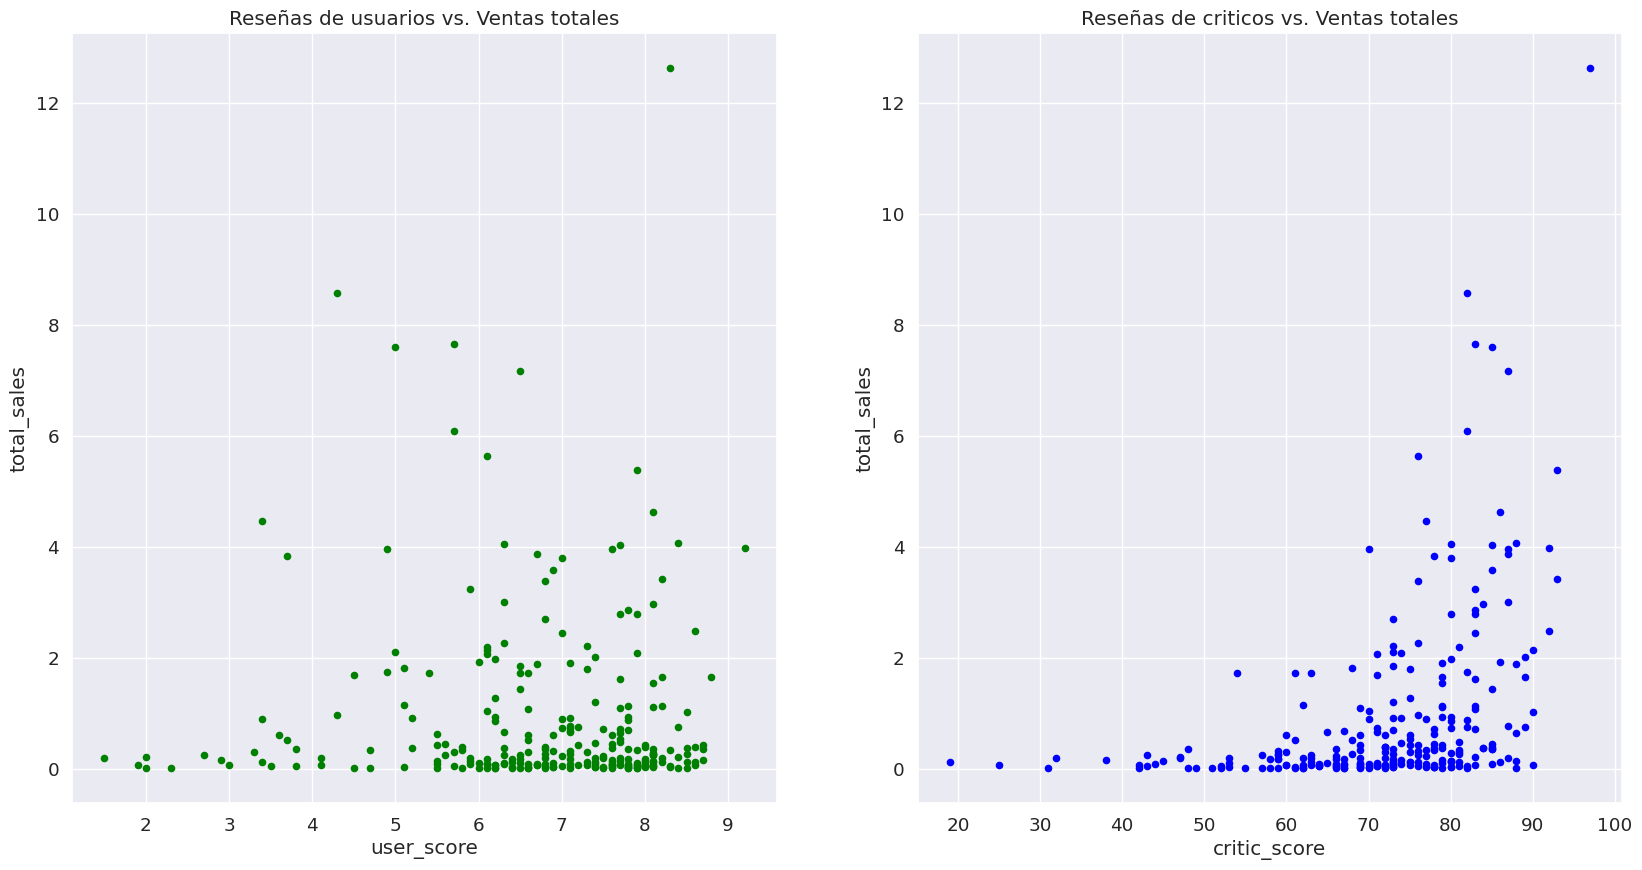

In [39]:
 ps4_data = games.query('platform == "PS4"')

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Creacion de grafico de dispersion para user_score y total_sales
ps4_data.plot(x='user_score', y='total_sales', kind='scatter', c='green', ax=axes[0])
axes[0].set_title('Reseñas de usuarios vs. Ventas totales')

# Calcular y mostrar el coeficiente de correlacion entre user_score y total_sales  
correlation_user = ps4_data['user_score'].corr(ps4_data['total_sales'])
print(f"Coeficiente de correlacion (User Score): {correlation_user}")

# Creacion de grafico de dispersion para critic_score y total_sales
ps4_data.plot(x='critic_score', y='total_sales', kind='scatter', c='blue', ax=axes[1])
axes[1].set_title('Reseñas de criticos vs. Ventas totales')

# Calcular y mostrar el coeficiente de correlacion entre critic_score y total_sales  
correlation_critic = ps4_data['critic_score'].corr(ps4_data['total_sales'])
print(f"Coeficiente de correlacion (Critic Score): {correlation_critic}")

plt.show()


El coeficiente de correlación  entre las calificaciones de los usuarios y las ventas totales de la plataforma PS4 es aproximadamente -0.032. Este coeficiente indica una correlación negativa muy débil entre las puntuaciones de los usuarios y las ventas totales. Entonces existe una relación negativa muy leve entre las puntuaciones de los usuarios y el rendimiento de las ventas de los juegos de PS4. Sin embargo, la correlación es cercana a cero, lo que sugiere que las puntuaciones de los usuarios tienen poco o ningún impacto en las ventas de juegos de PS4.

Por otro lado, el coeficiente de correlación entre las puntuaciones de las críticas y las ventas totales de la plataforma PS4 es de aproximadamente 0.407. Este coeficiente indica una correlación positiva moderada entre las puntuaciones de las críticas y las ventas totales. Esto indica que existe una relación moderada entre las reseñas proporcionadas por los críticos y el desempeño de las ventas de los juegos de PS4.

En resumen, las puntuaciones de los usuarios tienen un impacto insignificante en las ventas de juegos de PS4, mientras que las puntuaciones de los críticos tienen una influencia positiva moderada en el rendimiento de las ventas de juegos de PS4. Es más probable que las reseñas de los críticos afecten las ventas de los juegos de PS4 en comparación con las puntuaciones de los usuarios.


## Comparar las ventas de los mismo juegos en otras plataformas

Para hacer esto, empezaremos filtrando los juegos que son comunes en más de una plataforma, para luego filtrarlos en nuestro DataFrame yposteriormenre realizar una representación visual de estos datos.

Juegos disponibles en mas de una plataforma:


0                     Frozen: Olaf's Quest
1               2014 FIFA World Cup Brazil
2        3rd Super Robot Wars Z Jigoku Hen
3      3rd Super Robot Wars Z: Tengoku-Hen
4                            7 Days to Die
                      ...                 
468         Zero Escape: Zero Time Dilemma
469                                 ZombiU
470                    Zombie Army Trilogy
471                      Zoo Tycoon (2013)
472             Zumba Fitness: World Party
Name: name, Length: 473, dtype: object

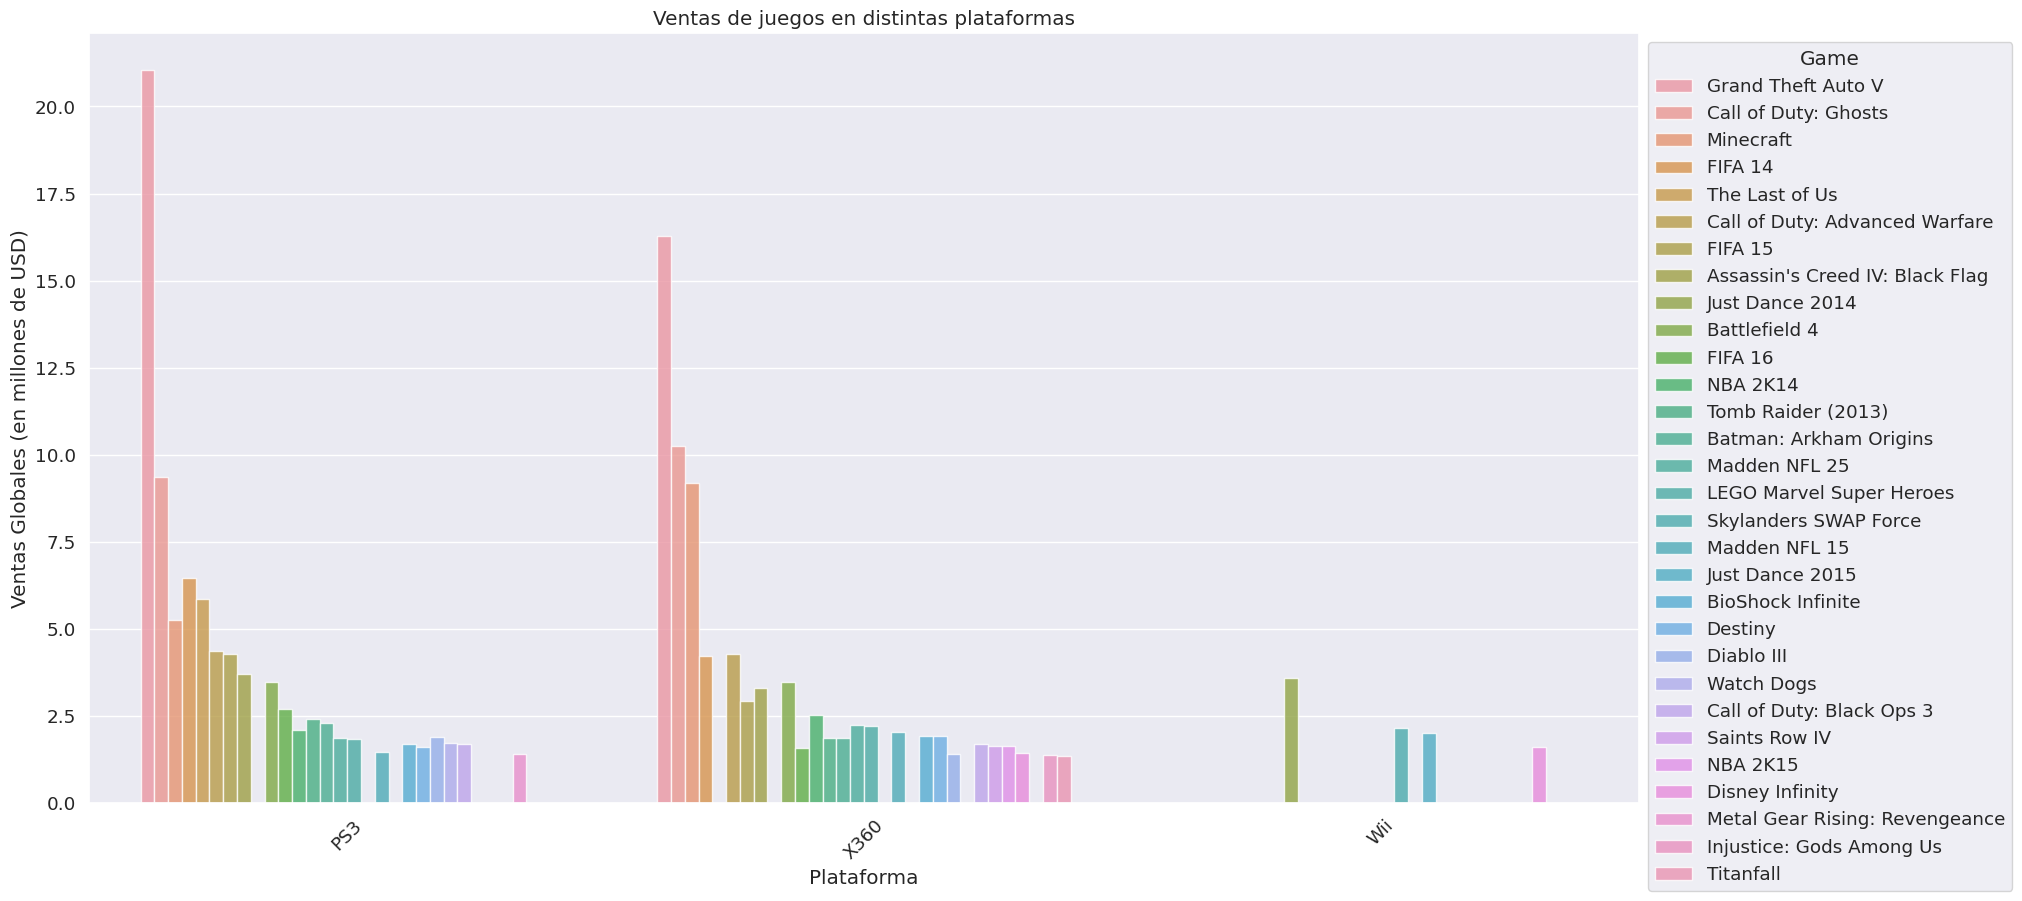

In [40]:
#Filtrar juegos que aparecen en mas de una plataforma
platform_counts = games.groupby('name')['platform'].nunique()
multiplatform_games = platform_counts[platform_counts > 1].reset_index()

#Mostrar nombres de los juegos y numero de veces que aparecen
print("Juegos disponibles en mas de una plataforma:")
display(multiplatform_games.name)

#Filtrar Dataframe games para incluir juegos multiplataforma

multiplat_data = games[games['name'].isin(multiplatform_games.name)]
top_platforms = ['Wii', 'PS3', 'X360',]
multiplat_data = multiplat_data[multiplat_data['platform'].isin(top_platforms)]


#Crear grafico de barras
custom_palette = sns.color_palette("husl", n_colors=len(multiplat_data['name'].unique()))

plt.figure(figsize=(20, 10))
sns.set(font_scale=1.2)
sns.barplot(
    x='platform',
    y='total_sales',
    hue='name',
    data=multiplat_data.iloc[0:50],
    dodge=True,
    alpha=.8 
)
plt.title('Ventas de juegos en distintas plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones de USD)')
plt.legend(title='Game', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)

plt.show()

Se observa que las ventas son distintas para cada plataforma. Aunque ciertos juegos que tuvieron que fueron un éxito de ventas a nivel global en una plataforma, replicaron el éxitos en otras (aun cuando las ventas fueron menores). Se puede ver con Grand Theft Auto V y Call of Duty, para PS3 y X360 respectivamente. En Wii no aparecen, pues no fueron lanzados en esta consola.

Para Wiii uno de los juegos más representativos es Just Dance, el cual si no fue y un éxito como GTA y Call of Duty, tuvo cierta presencia en PS3 y x360.

## Distribución general de los juegos por género

Veamos las ventas totales por género:

In [41]:
#Agrupar por género, sumando ventas globales
games_by_genres = games.groupby('genre')['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False)
games_by_genres


,genre,total_sales
0,Action,321.87
8,Shooter,232.98
10,Sports,150.65
7,Role-Playing,145.89
3,Misc,62.82
4,Platform,42.63
6,Racing,39.89
2,Fighting,35.31
1,Adventure,23.64
9,Simulation,21.76


Ahora vamos a crear un grafico de barras para visualizar la tabla anterior y ver claramente los géneros mas rentables en la industria

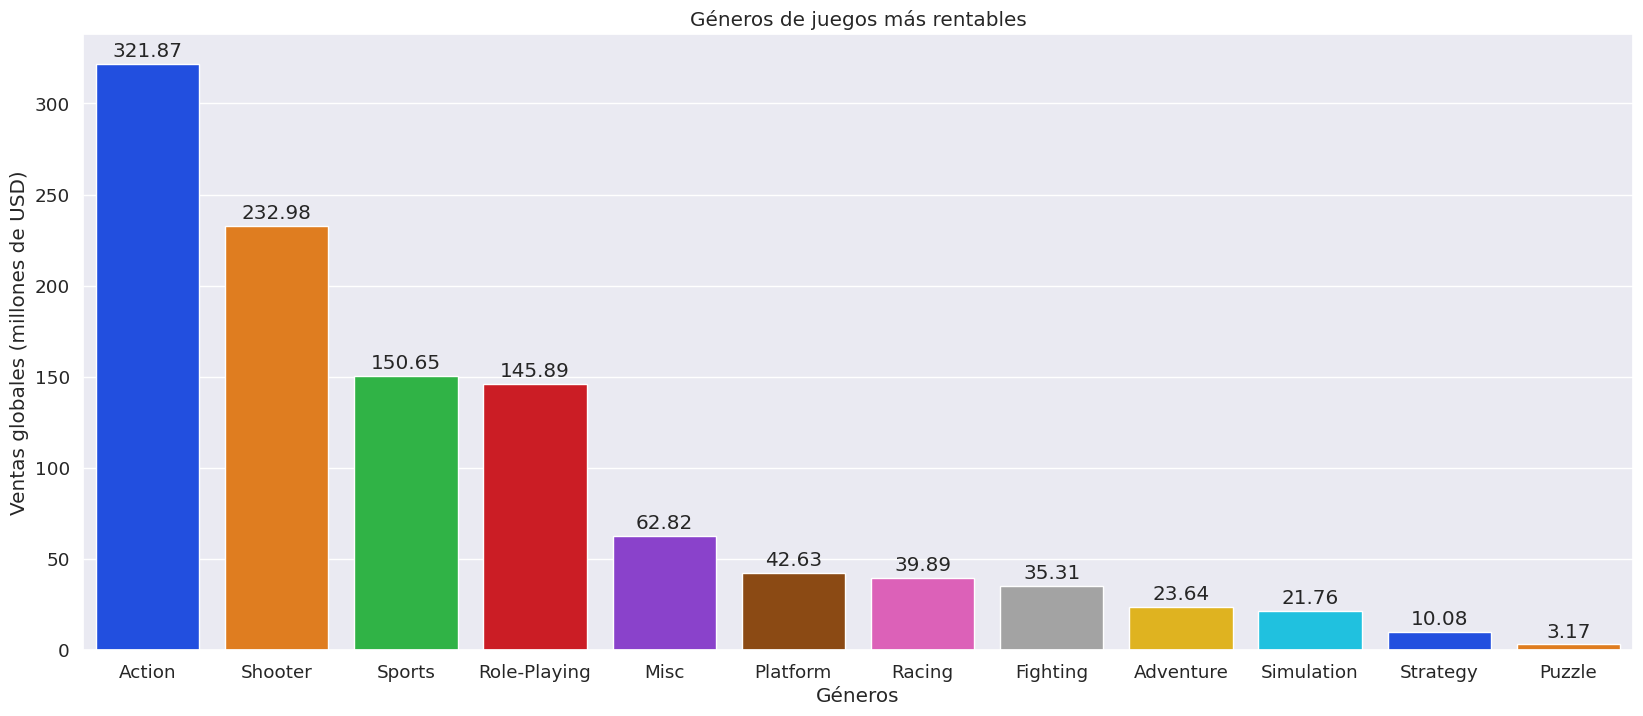

In [42]:

plt.figure(figsize=(20, 8))
sns.set(font_scale = 1.2)

ax = sns.barplot(data=games_by_genres, x='genre', y='total_sales', palette='bright')
ax.set(title='Géneros de juegos más rentables',
       xlabel='Géneros', 
       ylabel='Ventas globales (millones de USD)')

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

plt.show()

&#127918; Los géneros de juegos más rentables son **action y shooter**, con casi 322 y 233 millones de dolares respectivamente. Estos juegos dominan holgadamente las ventas y son la preferencia de los gamers en el mundo, sin importar la plataforma que adquieran.

&#127918; Otros géneros con ventas altas considerables son sports y role-playing. Deportes con 150.54 millones de USD y juegos de rol con 145 millones de USD. 

&#127918; Los géneros con menos ventas globales son juegos de simulacion, estrategia y acertijos.

En general, géneros como acción, shooter, deportes y juegos de rol tienden a tener un promedio de ventas alto y generar ingresos significativos. Por otro lado, géneros como acertijos y estrategia pueden tener ventas promedio más bajas y/o atraer a una audiencia más específica.


# Etapa 4. Crear un perfil de usuario para cada región

In [43]:
# Plataformas principales en NA
na_sales_grpd_by_platforms = games.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
na_sales_grpd_by_platforms

,platform,na_sales
4,PS4,108.74
10,XOne,93.12
9,X360,81.66
3,PS3,63.50
0,3DS,38.20
8,WiiU,29.21
2,PC,11.11
7,Wii,6.56
6,PSV,5.04
1,DS,0.57


In [44]:
# Plataformas principales en UE
eu_sales_grpd_by_platforms = games.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
eu_sales_grpd_by_platforms

,platform,eu_sales
4,PS4,141.09
3,PS3,67.81
10,XOne,51.59
9,X360,42.52
0,3DS,30.96
2,PC,25.36
8,WiiU,19.85
6,PSV,6.10
7,Wii,5.93
1,DS,0.85


In [45]:
# Plataformas principales en JP
jp_sales_grpd_by_platforms = games.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)
jp_sales_grpd_by_platforms

,platform,jp_sales
0,3DS,67.81
3,PS3,23.35
6,PSV,18.59
4,PS4,15.96
8,WiiU,10.88
5,PSP,3.29
9,X360,0.51
10,XOne,0.34
7,Wii,0.05
1,DS,0.00


In [46]:
# Plataformas en otras regiones
other_sales_grpd_by_platforms = games.groupby('platform')['other_sales'].sum().reset_index().sort_values(by='other_sales', ascending=False)
other_sales_grpd_by_platforms

,platform,other_sales
4,PS4,48.35
3,PS3,26.77
10,XOne,14.27
9,X360,12.11
0,3DS,6.28
8,WiiU,4.69
6,PSV,3.26
2,PC,2.96
7,Wii,1.12
1,DS,0.12


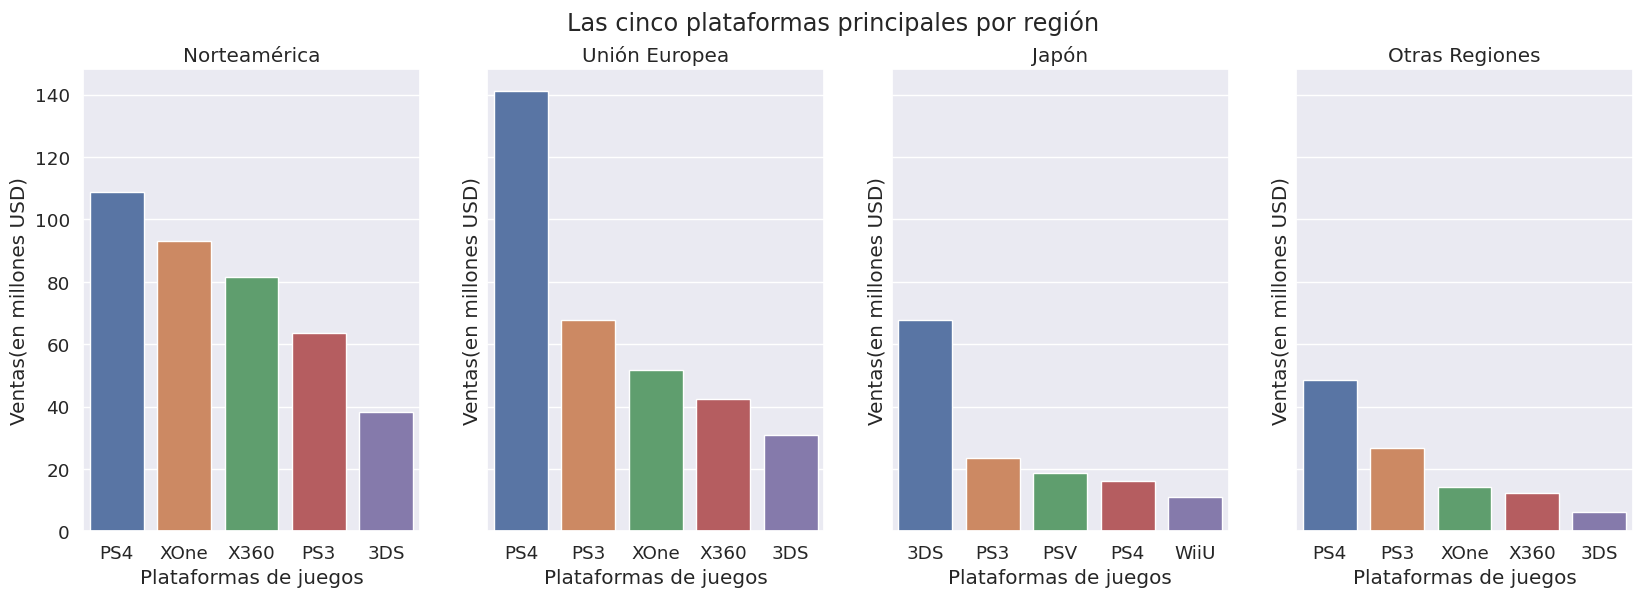

In [47]:

fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)
fig.suptitle('Las cinco plataformas principales por región')

#Grafico de NA
sns.barplot(ax=axes[0], data= na_sales_grpd_by_platforms.head(5), x='platform', y='na_sales', palette='deep')
axes[0].set(title='Norteamérica',
       xlabel='Plataformas de juegos', 
       ylabel='Ventas(en millones USD)')

#Grafico de UE 
sns.barplot(ax=axes[1], data= eu_sales_grpd_by_platforms.head(5), x='platform', y='eu_sales', palette='deep')
axes[1].set(title='Unión Europea',
       xlabel='Plataformas de juegos', 
       ylabel='Ventas(en millones USD)')

#Grafico de JP
sns.barplot(ax=axes[2], data= jp_sales_grpd_by_platforms.head(5), x='platform', y='jp_sales', palette='deep')
axes[2].set(title='Japón',
       xlabel='Plataformas de juegos', 
       ylabel='Ventas(en millones USD)')

##Grafico de otas regiones
sns.barplot(ax=axes[3], data= other_sales_grpd_by_platforms.head(5), x='platform', y='other_sales', palette='deep')
axes[3].set(title='Otras Regiones',
       xlabel='Plataformas de juegos', 
       ylabel='Ventas(en millones USD)')
plt.show()

De los datos sobre las ventas de la plataforma en diferentes regiones y los gráficos de barras anteriores, podemos concluir lo siguiente:

&#127918; La plataforma PS4 es la mas exitosa en términos de ventas en todas las regiones. Ocupa la primera posición en las regiones de América del Norte (NA) y Europa (UE), y también tiene un buen desempeño en la región japonesa (JP) y otras regiones. Esto sugiere una fuerte presencia y popularidad global para la plataforma PS4.

&#127918; La plataforma XOne tiene mas ventas en la region de Norteamerica, seguido de Europa.  Es interesante notar como Microsoft no ha logrado entrar de lleno en el mercado Japones.

&#127918; La plataforma Nintendo 3DS tiene un buen desempeño en la región japonesa, donde lidera las ventas. También ocupa una posición importante en las regiones de América del Norte y Europa, ocupando el cuarto y quinto lugar, respectivamente.

&#127918; En cuanto a las ventas de otras regiones PS4 es lider, PS3 ocupa el segundo lugar, seguido de las plataformas de Microsoft. Nintendo tiene presencia tambien con 3DS.


## Los cinco géneros principales por región

In [48]:
#géneros principales en NA
na_sales_grpd_by_genre = games.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index()
na_sales_grpd_by_genre

,genre,na_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49
5,Platform,18.14
6,Fighting,15.55
7,Racing,12.96
8,Adventure,7.14
9,Simulation,4.86


In [49]:
#géneros principales en UE
eu_sales_grpd_by_genre = games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index()
eu_sales_grpd_by_genre

,genre,eu_sales
0,Action,118.13
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19
5,Misc,20.04
6,Platform,15.58
7,Simulation,10.92
8,Fighting,8.55
9,Adventure,8.25


In [50]:
#géneros principales en JP
jp_sales_grpd_by_genre = games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index()
jp_sales_grpd_by_genre

,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61
5,Adventure,5.82
6,Sports,5.41
7,Platform,4.79
8,Simulation,4.52
9,Racing,2.30


In [51]:
#géneros principales de otras regiones
other_sales_grpd_by_genre = games.groupby('genre')['other_sales'].sum().sort_values(ascending=False).reset_index()
other_sales_grpd_by_genre

,genre,other_sales
0,Action,37.20
1,Shooter,28.77
2,Sports,19.45
3,Role-Playing,11.48
4,Misc,6.09
5,Racing,4.44
6,Platform,4.12
7,Fighting,3.56
8,Adventure,2.43
9,Simulation,1.46


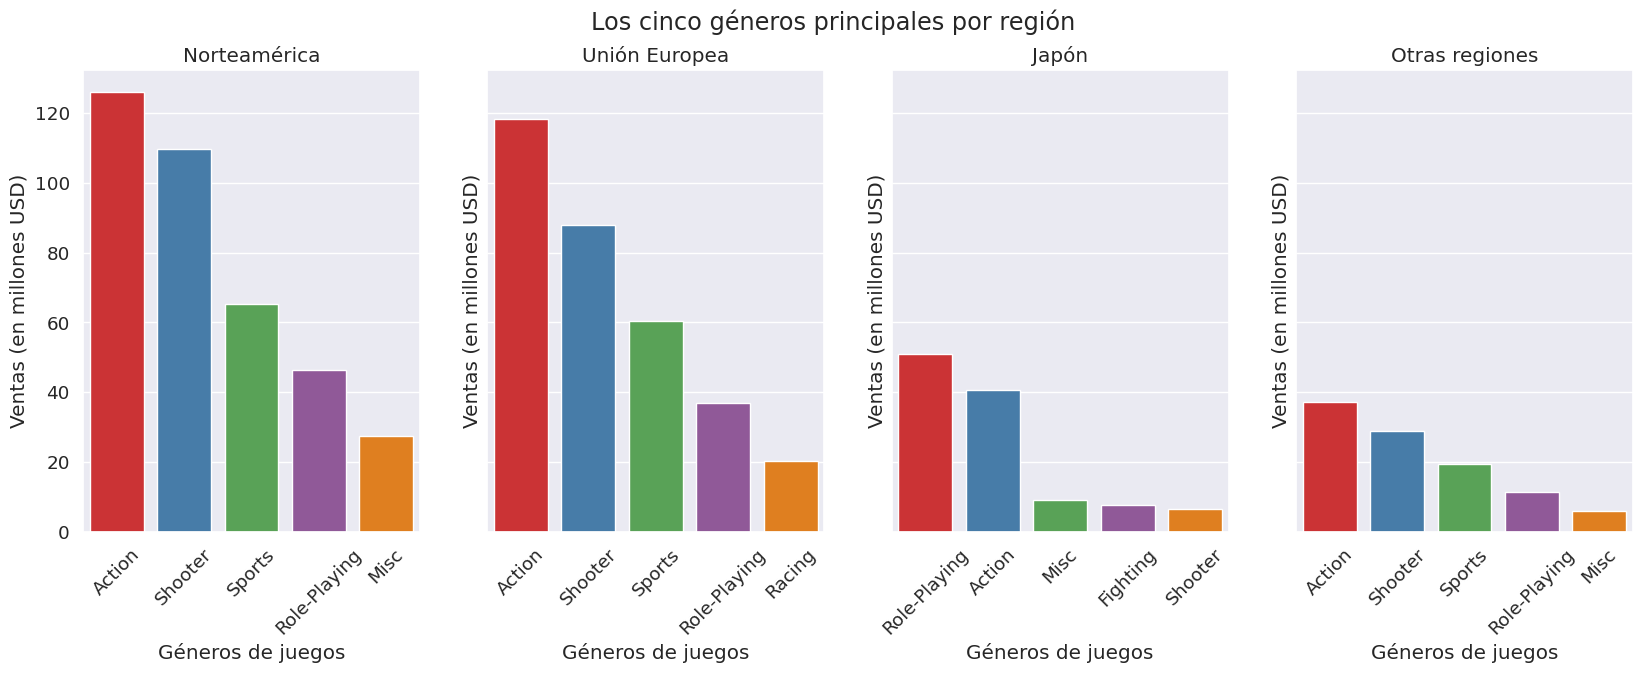

In [52]:

fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)
fig.suptitle('Los cinco géneros principales por región')

#Grafico de NA
bar_plot_1 = sns.barplot(ax=axes[0], data=na_sales_grpd_by_genre.head(5), x='genre', y='na_sales', palette='Set1')
axes[0].set(title='Norteamérica',
       xlabel='Géneros de juegos', 
       ylabel='Ventas (en millones USD)')
bar_plot_1.set_xticklabels(bar_plot_1.get_xticklabels(), rotation=45)

#Grafico de UE
bar_plot_2 = sns.barplot(ax=axes[1], data=eu_sales_grpd_by_genre.head(5), x='genre', y='eu_sales', palette='Set1')
axes[1].set(title='Unión Europea',
       xlabel='Géneros de juegos', 
       ylabel='Ventas (en millones USD)')
bar_plot_2.set_xticklabels(bar_plot_2.get_xticklabels(), rotation=45)

##Grafico de JP
bar_plot_3 = sns.barplot(ax=axes[2], data=jp_sales_grpd_by_genre.head(5), x='genre', y='jp_sales', palette='Set1')
axes[2].set(title='Japón',
       xlabel='Géneros de juegos', 
       ylabel='Ventas (en millones USD)')
bar_plot_3.set_xticklabels(bar_plot_3.get_xticklabels(), rotation=45)

# #Grafico de otras regiones
bar_plot_4 = sns.barplot(ax=axes[3], data=other_sales_grpd_by_genre.head(5), x='genre', y='other_sales', palette='Set1')
axes[3].set(title='Otras regiones',
       xlabel='Géneros de juegos', 
       ylabel='Ventas (en millones USD)')
bar_plot_4.set_xticklabels(bar_plot_4.get_xticklabels(), rotation=45)

plt.show()

A partir de estos datos podemos deducir:

Los géneros más vendidos en Norteamérica son Acción y Shooter, seguidos de Deportes y Juegos de rol. Estos géneros tienen las mayores ventas en la región, lo que indica una fuerte preferencia por experiencias de juego llenas de acción.

La región europea tiene un patrón muy similar al de Norteamérica. Con excepción del género misceláneo, los gamers europeos prefieren los juegos de racing en el quinto lugar.

Japón tiene definitivamente una cultura muy diferente en torno a los videojuegos. Los juegos de rol toman la delantera como género más vendido, superando a la acción. El mercado japonés muestra una fuerte preferencia por los juegos de rol inmersivos y basados en historias, desplazando al género shooter al quinto lugar en ventas. Los juegos de acción también tiene un buen desempeño en esta región.

En cuanto a los géneros:

Acción y shooter: Estos géneros tienen un buen desempeño general en todas las regiones, lo que indica su amplia popularidad. Atraen a una audiencia amplia a nivel global.

Deportes y juegos de rol: los juegos deportivos tienen ventas significativas en todas las regiones, lo que destaca el atractivo global de los deportes competitivos. Los juegos de rol, si bien son populares en Norteamérica, Europa y Japón, tienen ventas comparativamente menores en otras regiones.

Racing y Platafom: Estos géneros tienen mayores ventas en Europa y Norteamérica en comparación con otras regiones. Los juegos de carreras, en particular, obtienen mejores resultados en Europa, lo que sugiere un interés regional en las simulaciones de carreras.

Misc, adventure, simulation, y strategy: Estos géneros muestran diferentes ventas según las regiones. El género varios tiene un rendimiento relativamente mejor en Norteamérica y Europa, el género de aventuras tiene ventas estables en todas las regiones, el género de simulación tiene ventas más fuertes en Europa y el género de estrategia tiene ventas relativamente más bajas en general.

En general, los datos resaltan las diferentes preferencias de género en diferentes regiones, influenciadas por factores culturales, tradiciones de juego y preferencias de la audiencia. Los géneros de acción y shooters tienen un atractivo global, mientras que el predominio de los juegos de rol en Japón y el interés por las carreras en Europa muestran diferencias regionales.


### Las clasificaciones de ESRB afectan a las ventas en regiones individuales?

Ahora, calculemos la suma de todas las ventas por region agrupadas por clasificacion ESBR:

In [53]:
total_sales_grpd_by_ratings = games.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()
total_sales_grpd_by_ratings

,rating,na_sales,eu_sales,jp_sales,other_sales
0,E,79.05,83.36,15.14,22.61
1,E10+,54.24,42.69,5.89,12.57
2,M,165.21,145.32,14.11,47.04
3,T,49.79,41.95,20.59,14.29


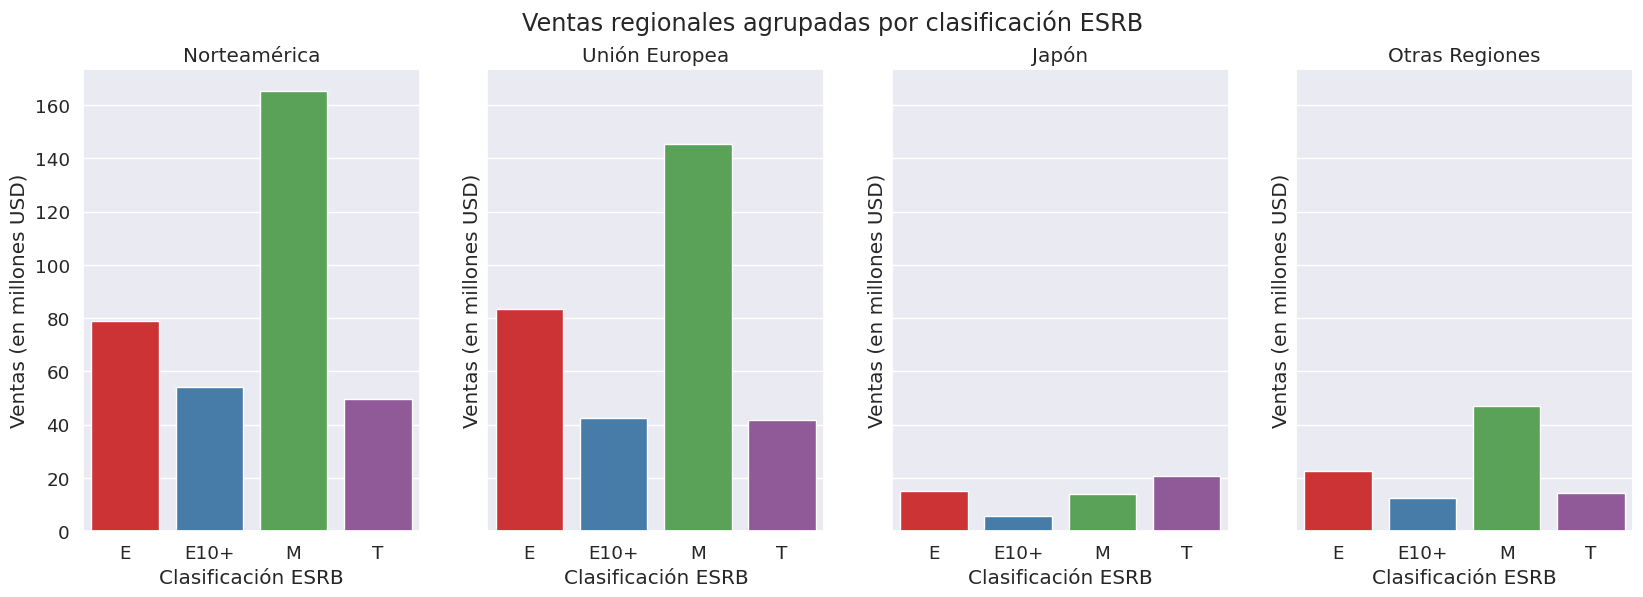

In [54]:

fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)
fig.suptitle('Ventas regionales agrupadas por clasificación ESRB')

# 
sns.barplot(ax=axes[0], data= total_sales_grpd_by_ratings, x='rating', y='na_sales', palette='Set1')
axes[0].set(title='Norteamérica',
       xlabel='Clasificación ESRB', 
       ylabel= 'Ventas (en millones USD)')

# 
sns.barplot(ax=axes[1], data= total_sales_grpd_by_ratings, x='rating', y='eu_sales', palette='Set1')
axes[1].set(title='Unión Europea',
       xlabel='Clasificación ESRB', 
       ylabel='Ventas (en millones USD)')

# 
sns.barplot(ax=axes[2], data= total_sales_grpd_by_ratings, x='rating', y='jp_sales', palette='Set1')
axes[2].set(title='Japón',
       xlabel='Clasificación ESRB', 
       ylabel='Ventas (en millones USD)')

#
sns.barplot(ax=axes[3], data= total_sales_grpd_by_ratings, x='rating', y='other_sales', palette='Set1')
axes[3].set(title='Otras Regiones',
       xlabel='Clasificación ESRB', 
       ylabel='Ventas (en millones USD)')

plt.show()


De esta información podemos deducir:

Ventas totales por clasificación ESRB: las categorías de clasificación ESRB E (Everyone) y M (Mature) tienen las ventas totales más altas. La calificación ESRB E tiene un valor de ventas total de 200.16 (suma de NA, EU, JP y otras ventas), mientras que la calificación ESRB M tiene un valor de ventas total de 371.96. Estas dos categorías de calificación son las que contribuyen más a las ventas generales.

En cuanto a las ventas por región:

Cuando se analizan regiones individuales, la influencia de las calificaciones de la ESRB en las ventas varía. Por ejemplo, en Norteamérica, los juegos con clasificación ESRB M tienen las mayores ventas, seguidos por los de clasificación ESRB E. En Europa, las ventas más altas también se observan para la clasificación ESRB M, pero la clasificación ESRB E le sigue de cerca.
En Japón, la clasificación ESRB T (Teen) tiene la ventaja en ventas. También E (Everyone) y M(Mature) tienen ventas significativas. En otras regiones, la calificación ESRB M lidera las ventas, pero las calificaciones ESRB E y T también contribuyen.

En general, las clasificaciones de la ESRB influyen en las ventas de juegos; la calificación para adultos (M) generalmente tiene ventas totales significativas.
 


# Etapa 5. Probar las hipótesis

###  Comparar las calificaciones promedio de los usuarios para las plataformas Xbox One y PC 

### 1. Hipótesis nula / Hipótesis alternativa

Para poder probar las hipótesis, tenemos que formular una hipótesis nula y una hipótesis alternativa. Es importante recordar que las hipótesis nula y alternativa son dos afirmaciones mutuamente excluyentes sobre un parámetro o población. La hipótesis nula (a menudo abreviada como H0) afirma que no hay efecto o diferencia. La hipótesis alternativa (a menudo abreviada como H1 o HA) es lo que queremos probar.

Para comparar las calificaciones de los usuarios de las plataformas Xbox One y PC, formulemos ambas hipótesis:

**Hipótesis nula (H0):** _Las calificaciones promedio de los usuarios en Xbox One son iguales a las calificaciones promedio de los usuarios en PC._

**Hipótesis alternativa (H1):** _Las calificaciones promedio de los usuarios en Xbox One NO son iguales a las calificaciones promedio de los usuarios en PC._

### Selección de test estadístico

Dado que estamos comparando las medias de dos grupos de muestras independientes: plataformas Xbox One y PC, realizaremos una prueba t de dos muestras. Para realizar una prueba t de dos muestras, podemos usar ttest_ind() de scipy.stats. Esta función da un valor estadístico t y un valor p.

Dado que estamos comparando las medias de dos grupos de muestras independientes: plataformas Xbox One y PC, realizaremos una prueba t de dos muestras. Para realizar una prueba t de dos muestras, podemos usar ttest_ind() de scipy.stats. Esta función da un valor estadístico t y un valor p.

### Nivel de significancia

Fijaremos nuestro nivel de significancia:  **alpha = 0.05**

In [55]:
# Obtener ratings de usuarios de Xbox One y eliminar valores NaN
xbox_one_user_scores = games.loc[games['platform'] == "XOne", 'user_score'].dropna()
xbox_one_user_scores

# Obtener ratings de usuarios de PC y eliminar valores NaN
pc_user_scores = games.loc[games['platform'] == "PC", 'user_score'].dropna()
pc_user_scores



458      3.9
1094     7.9
1350     2.2
1436     6.0
1529     5.4
        ... 
16454    8.3
16461    6.8
16507    7.9
16516    1.4
16690    7.6
Name: user_score, Length: 155, dtype: float64

Vamos a realizar nuestra prueba estadistica:

In [56]:
#Verificar las varianzas
#XBOX
varianza_x = xbox_one_user_scores.var()
print(f'Varianza de Xbox One:{varianza_x}')
#PC
varianza_p = pc_user_scores.var()
print(f'Varianza de PC:{varianza_p}')
print('Las varianzas son diferentes por lo que equal_var se fijara en False para el ttest\n')

#Verificar desviacion estandar
sd_x = xbox_one_user_scores.std()
print(f'Desviacion estandar de Xbox One:{sd_x}')

sd_pc = pc_user_scores.std()
print(f'Desviacion estandar de PC:{sd_pc}')

# Realizar el ttest
alpha = 0.05
results, pvalue = st.ttest_ind(xbox_one_user_scores, pc_user_scores, equal_var = False)

display('p-value : ', pvalue)

if (pvalue < alpha):
    print("Podemos rechazar la hipótesis nula.")
else:
    print("No podemos rechazar la hipótesis nula.")

Varianza de Xbox One:1.9069968429360695
Varianza de PC:3.035892752408882
Las varianzas son diferentes por lo que equal_var se fijara en False para el ttest

Desviacion estandar de Xbox One:1.380940564592144
Desviacion estandar de PC:1.7423813452883619


'p-value : '

0.14759594013430463

No podemos rechazar la hipótesis nula.


Esto quiere decir que la hipótesis: **Las calificaciones promedio de los usuarios en Xbox One son iguales a las calificaciones promedio de los usuarios en PC es verdadera.**

###  Comparar las calificaciones promedio de los usuarios para los géneros de Acción y Deportes

Primero, vamos a formular nuestras hipótesis para poder comparar las calificaciones promedio de los usuarios para los géneros de Acción y Deportes.

**Hipótesis nula (H0):** _Las calificaciones promedio de los usuarios para el género de Acción son iguales a las calificaciones promedio a las de Deportes._

**Hipótesis alternativa (H1):** _Las calificaciones promedio de los usuarios para el género de Acción NO son iguales a las calificaciones promedio a las de Deportes._

### Selección de test estadístico

Dado que estamos comparando las medias de dos grupos de muestras independientes: plataformas Xbox One y PC, realizaremos una prueba t de dos muestras. Para realizar una prueba t de dos muestras, podemos usar ttest_ind() de scipy.stats. Esta función da un valor estadístico t y un valor p.

Dado que estamos comparando las medias de dos grupos de muestras independientes: géneros de Acción y Deportes, realizaremos una prueba t de dos muestras. Para realizar una prueba t de dos muestras, podemos usar ttest_ind() de scipy.stats. Esta función da un valor estadístico t y un valor p.

### Nivel de significancia

Fijaremos nuestro nivel de significancia:  **alpha = 0.05**

In [57]:
action_genre_user_scores = games.loc[games['genre'] == "Action", 'user_score'].dropna()
action_genre_user_scores

16       8.2
23       8.1
42       8.3
149      9.1
165      7.9
        ... 
16595    6.0
16650    8.5
16652    5.1
16658    6.7
16690    7.6
Name: user_score, Length: 389, dtype: float64

In [58]:
sports_genre_user_scores = games.loc[games['genre'] == "Sports", 'user_score'].dropna()
sports_genre_user_scores

77       4.3
94       5.0
126      4.3
143      5.7
264      4.5
        ... 
16140    8.8
16144    6.9
16448    4.5
16516    1.4
16641    6.6
Name: user_score, Length: 160, dtype: float64

In [59]:
#Verificar las varianzas
#Accion
varianza_x = action_genre_user_scores.var()
print(f'Varianza de genero Accion:{varianza_x}')
#Deportes
varianza_p = sports_genre_user_scores.var()
print(f'Varianza de genero Deportes:{varianza_p}')
print('Las varianzas son diferentes por lo que equal_var se fijara en False para el ttest\n')

#Verificar desviacion estandar
sd_x = action_genre_user_scores.std()
print(f'Desviacion estandar Accion:{sd_x}')

sd_p = sports_genre_user_scores.std()
print(f'Desviacion estandar Deportes:{sd_p}')

# Realizar el ttest
alpha = 0.05
results, pvalue  = st.ttest_ind(action_genre_user_scores, sports_genre_user_scores, equal_var = False)

display('p-value : ', pvalue)

if (pvalue < alpha):
    print("Podemos rechazar la hipótesis nula.")
else:
    print("No podemos rechazar la hipótesis nula.")

Varianza de genero Accion:1.7693609042482705
Varianza de genero Deportes:3.180612814465409
Las varianzas son diferentes por lo que equal_var se fijara en False para el ttest

Desviacion estandar Accion:1.3301732609883083
Desviacion estandar Deportes:1.7834272663793747


'p-value : '

1.4460039700704315e-20

Podemos rechazar la hipótesis nula.


Esto significa que la hipótesis alternativa: **Las calificaciones promedio de los usuarios para el género Acción NO son iguales a las calificaciones promedio de los usuarios para el género Deportes es verdadera**.

# Etapa 6. Conclusiones

Datos de plataforma: el conjunto de datos incluye una amplia gama de plataformas de juegos, siendo PlayStation 2 (PS2) y Nintendo DS (DS) las más frecuentes. Plataformas populares como PlayStation 3 (PS3), Wii, Xbox 360 (X360) y PlayStation (PSP) también están bien representadas.

Datos del año de lanzamiento: el conjunto de datos cubre los lanzamientos de juegos desde 1977 hasta 2016, con recuentos más altos desde mediados de la década de 2000 hasta principios de la década de 2010. Esto indica un período activo para los lanzamientos de juegos durante ese tiempo, mientras que los años anteriores tienen relativamente menos lanzamientos.

Datos de género: el conjunto de datos incluye una amplia gama de géneros de juegos, siendo "Action" el más común. Otros géneros populares incluyen "Sports", "Role Playing", "Shooter" y "Misc". Géneros como “Adventure, “Racing”, “Simulation y “Platforms” también tienen una presencia importante.

Número de juegos lanzados: el número de juegos lanzados generalmente ha aumentado con el tiempo; desde finales de los años 1990 hasta principios de los 2000 se experimentó un aumento significativo. El número máximo de juegos se lanzó en 2008 y 2009.

Variación de ventas de plataforma a plataforma: La plataforma PlayStation 2 (PS2) tiene las ventas totales más altas, seguida de Xbox 360 (X360) y PlayStation 3 (PS3). Algunas plataformas, como DS, PS, PS2, PS3, Wii y X360, solían ser populares pero ahora no tienen ventas.

Duración de las plataformas y picos de ventas: las consolas más nuevas tienden a generar ventas significativas y alcanzan sus picos de ventas más rápido que las consolas más antiguas. Las plataformas más nuevas tardaron entre 3 y 4 años en establecer una presencia significativa, mientras que las plataformas más antiguas tardaron entre 7 y 10 años.

Plataformas potencialmente rentables (2013-2016): PS4 y Xbox One (XOne) fueron identificadas como plataformas potencialmente rentables durante el período especificado. PS3 también mantuvo cifras de ventas notables. Las ventas de PC, a pesar de no ser muy significativas, han sido constantes hasta 2016.

Ventas globales de juegos por plataforma: los datos de ventas varían según las plataformas, con diferentes distribuciones y niveles de coherencia. PS4 tiene el promedio de ventas más alto, seguida de Xbox One (XOne) y PS3.

Efecto de las reseñas de usuarios y profesionales en las ventas: PS4 muestra una correlación positiva moderada entre las puntuaciones de los críticos y las ventas totales, lo que indica que las reseñas positivas influyen en las ventas hasta cierto punto.

Ventas de los mismos juegos en otras plataformas: Los juegos que fueron más vendidos en PS4 tuvieron ventas altas en XOne.

Distribución general de juegos por género: Los géneros de Acción y Shooter son los más rentables en términos de ventas totales, mientras que los géneros de Puzzle y Estrategia tienen menores ventas. Los juegos de disparos, en promedio, generan los mayores ingresos.